## Exploratory Data Analysis and Visualisation

The term Exploratory Data Analysis (EDA) was introduced by John Tukey in his book of the same title published in 1977. It is an approach of data analysis in which you employ a number of simple quantitative techniques (for example, descriptive statistics like the mean and the standard deviation) and visualisation to explore features of the data with an ['open mind'](https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-32833-1_136), before any particular statistical assumptions and models are applied to the data. 

> "'Exploratory data analysis' is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there." — John Tukey, 1977

EDA can be seen as a paradigm of data analysis emphasising the 'flexibility' of data exploration and visualisation and the ability of a researcher to adapt to the 'clues' the data may reveal. Note that EDA is performed before data modelling. EDA is therefore different from any data exploration after the outputs from initial modelling are known, which is typically not regarded as a good research practice, unless openly reported. Such post-modelling exploration would likely motivate additional tests that are arbitrary yet could produce positive and statistically significant results (See Simmons, Nelson, and Simonsohn, [2011](https://doi.org/10.1177/0956797611417632)).

In this lab, we will explore and visualise various features and patterns in the mobility trends data using the Python libraries `pandas` for data analysis and `SciPy` and `NumPy` for descriptive statistics and simple modelling. We will introduce the library `Seaborn` for data visualisation. [`Seaborn`](https://seaborn.pydata.org/index.html) is a Python data visualisation library built on top of `matplotlib`. It provides an interface for drawing attractive and informative statistical graphics.   

We formulate simple research questions (RQ) and employ EDA to shed light on features of data that can help us address those research questions. We will perform various visualizations to communicate quantitative features, patterns, and longitudinal trends in our data. We will discuss good research practices related to EDA and visualisation.

## Learning resources

<i class="fas fa-book"></i> Sam Lau, Joey Gonzalez, and Deb Nolan. [10.4. Visualization Principles](https://www.textbook.ds100.org/ch/11/viz_intro.html). In [_Principles and Techniques of Data Science_](https://www.textbook.ds100.org/intro.html).

<i class="fas fa-scroll"></i> Kieran Healy and James Moody. [Data Visualization in Sociology](https://kieranhealy.org/files/papers/data-visualization.pdf). _Annual Review of Sociology_.

<i class="fas fa-play-circle"></i> [Misleading Axes](https://youtu.be/9pNWVMxaFuM) and [Manipulating Bin Sizes](https://youtu.be/zAg1wsYfwsM), part of the course [Calling Bullshit](https://www.callingbullshit.org) by Carl T. Bergstrom and Jevin West

<i class="fas fa-play-circle"></i> <i class="fas fa-code"></i> [Introduction to Data Processing in Python with Pandas](https://www.youtube.com/watch?v=5rNu16O3YNE), SciPy 2019 Tutorial by Daniel Chen (The visualisation library `Seaborn` is covered in the video between 2:15 and 2:45)

# Addressing simple questions via Python EDA

## Importing libraries

We first import Python libraries for exploratory data analysis and visualisation. We also import the libraries `Statsmodels` and `SciPy` for statistical and scientific computing, which we will use to fit simple statistical models after our data explorations.

In [45]:
# Import Python libraries for visualisation and data analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()  # Apply the default Seaborn theme
%matplotlib inline

# Suppress warnings to avoid potential confusion
import warnings

# Libraries for statistical and scientific computing
import statsmodels.api as sm
from scipy import stats

warnings.filterwarnings("ignore")

## Loading and processing the COVID-19 mobility data

In [2]:
# Load the Covid-19 Google Community Mobility Reports
# By default, Pandas will read the date column as string, so we use parse_dates to
# convert the string into datetimes we will use for time series plots.
mobility_trends_complete = pd.read_csv(
    "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv",
    parse_dates=["date"],
)

# The Community Mobility Reports is updated daily, approaching
# 10 million rows as of April 2022. To make data analysis more
# manageable, we select a subset of the dataset until 30 June 2021
# (15 February 2020 is the first time point in the data set).
mobility_trends = mobility_trends_complete[
    mobility_trends_complete["date"].isin(
        pd.date_range(start="2020-02-15", end="2021-06-30")
    )
]

# Rename (i.e., shorten the labels) the six mobility categories
mobility_trends.rename(
    columns={
        "retail_and_recreation_percent_change_from_baseline": "Retail_Recreation",
        "grocery_and_pharmacy_percent_change_from_baseline": "Grocery_Pharmacy",
        "parks_percent_change_from_baseline": "Parks",
        "transit_stations_percent_change_from_baseline": "Transit_stations",
        "workplaces_percent_change_from_baseline": "Workplaces",
        "residential_percent_change_from_baseline": "Residential",
    },
    inplace=True,
)

mobility_trends

country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
9698159                  ZW              Zimbabwe  Midlands Province   
9698160                  ZW              Zimbabwe  Midlands Province   
9698161                  ZW              Zimbabwe  Midlands Province   
9698162                  ZW              Zimbabwe  Midlands Province   
9698163                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code  \
0                NaN        NaN             NaN               NaN   
1                NaN        NaN             NaN               NaN   
2                NaN        NaN             NaN               NaN   
3                NaN        NaN             NaN               NaN   
4                NaN        NaN             NaN               NaN   
...              ...        ...             ...               ...   
9698159       Kwekwe        NaN             NaN               NaN   
9698160       Kwekwe        NaN             NaN               NaN   
9698161       Kwekwe        NaN             NaN               NaN   
9698162       Kwekwe        NaN             NaN               NaN   
9698163       Kwekwe        NaN             NaN               NaN   

                            place_id       date  Retail_Recreation  \
0        ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-15                0.0   
1        ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-16                1.0   
2        ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-17               -1.0   
3        ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-18               -2.0   
4        ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-19               -2.0   
...                              ...        ...                ...   
9698159  ChIJRcIZ3-FJNBkRRsj55IcLpfU 2021-06-24                NaN   
9698160  ChIJRcIZ3-FJNBkRRsj55IcLpfU 2021-06-25                NaN   
9698161  ChIJRcIZ3-FJNBkRRsj55IcLpfU 2021-06-28                NaN   
9698162  ChIJRcIZ3-FJNBkRRsj55IcLpfU 2021-06-29                NaN   
9698163  ChIJRcIZ3-FJNBkRRsj55IcLpfU 2021-06-30                NaN   

         Grocery_Pharmacy  Parks  Transit_stations  Workplaces  Residential  
0                     4.0    5.0               0.0         2.0          1.0  
1                     4.0    4.0               1.0         2.0          1.0  
2                     1.0    5.0               1.0         2.0          1.0  
3                     1.0    5.0               0.0         2.0          1.0  
4                     0.0    4.0              -1.0         2.0          1.0  
...                   ...    ...               ...         ...          ...  
9698159               NaN    NaN               NaN         7.0          NaN  
9698160               NaN    NaN               NaN        13.0          NaN  
9698161               NaN    NaN               NaN        -3.0          NaN  
9698162               NaN    NaN               NaN        12.0          NaN  
9698163               NaN    NaN               NaN         5.0          NaN  

[5970596 rows x 15 columns]

# Code reuse: creating your own functions

We will need to pre-process the mobility data in subsequent chapters as well. Instead of typing (or copying and pasting) the lines of code for pre-processing multiple times, which would likely introduce errors, it is a good practice to define your own function that stores your code. You can then call that function when you need to reuse the code. Below we define two functions called `subperiod_mobility_trends` and `rename_mobility_trends` which we will use in the next lesson to process the mobility data.

Let's use the `subperiod_mobility_trends` as an example. As every function (see the book [Python Basics: A Practical Introduction to Python 3](https://github.com/realpython/python-basics-exercises)), `subperiod_mobility_trends` has three parts: 
* function signature
* docstring (short for documentation strings)
* function body

Let's describe each of these three parts. 

The function signature has the following four components: 
1. the `def` keyword (short for define)
2. the function name, `subperiod_mobility_trends`
3. the list of parameters, `data`, `start_date`, and `end_date` (these are placeholders for the actual data and start and end dates we will provide when we call the function)
4. A colon (:) at the end of the line of code. 

The docstring is placed immediately after the function definition (the function signature), enclosed in triple-double quotes ("""). The purpose of the dosctrings is to document the code and to state its main purpose.

The function body consists of the code that runs when you call the function. For example, the function body for `subperiod_mobility_trends` consists of a block of code that selects a subset of the mobility data for a period of time with pre-specified start date and end date.
 
Let's define our function for selecting mobility trends for a subperiod and save the function as `subperiod_mobility_trends.py` so that we can reuse the code in subsequent notebooks.  

In [3]:
def subperiod_mobility_trends(data, start_date, end_date):
    """
    Add your mobility data in `data`.

    This function selects a subperiod of the mobility data based on prespecified start data and end date.
    """
    mobility_trends = data[
        data["date"].isin(pd.date_range(start=start_date, end=end_date))
    ]
    return mobility_trends


def rename_mobility_trends(data):
    """
    This function renames the column headings of the six mobility categories.
    """
    mobility_trends_renamed = data.rename(
        columns={
            "retail_and_recreation_percent_change_from_baseline": "Retail_Recreation",
            "grocery_and_pharmacy_percent_change_from_baseline": "Grocery_Pharmacy",
            "parks_percent_change_from_baseline": "Parks",
            "transit_stations_percent_change_from_baseline": "Transit_stations",
            "workplaces_percent_change_from_baseline": "Workplaces",
            "residential_percent_change_from_baseline": "Residential",
        }
    )
    return mobility_trends_renamed

Let's call our functions. We pass as input to the function `subperiod_mobility_trends()` the complete Community Mobility Reports data set  we already loaded as `mobility_trends_complete`. We then pass the output as input to the function `rename_mobility_trends()`.

In [4]:
mobility_trends = subperiod_mobility_trends(
    mobility_trends_complete, "2020-02-15", "2021-06-30"
)

mobility_trends = rename_mobility_trends(mobility_trends)

mobility_trends

country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
9698159                  ZW              Zimbabwe  Midlands Province   
9698160                  ZW              Zimbabwe  Midlands Province   
9698161                  ZW              Zimbabwe  Midlands Province   
9698162                  ZW              Zimbabwe  Midlands Province   
9698163                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code  \
0                NaN        NaN             NaN               NaN   
1                NaN        NaN             NaN               NaN   
2                NaN        NaN             NaN               NaN   
3                NaN        NaN             NaN               NaN   
4                NaN        NaN             NaN               NaN   
...              ...        ...             ...               ...   
9698159       Kwekwe        NaN             NaN               NaN   
9698160       Kwekwe        NaN             NaN               NaN   
9698161       Kwekwe        NaN             NaN               NaN   
9698162       Kwekwe        NaN             NaN               NaN   
9698163       Kwekwe        NaN             NaN               NaN   

                            place_id       date  Retail_Recreation  \
0        ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-15                0.0   
1        ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-16                1.0   
2        ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-17               -1.0   
3        ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-18               -2.0   
4        ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-19               -2.0   
...                              ...        ...                ...   
9698159  ChIJRcIZ3-FJNBkRRsj55IcLpfU 2021-06-24                NaN   
9698160  ChIJRcIZ3-FJNBkRRsj55IcLpfU 2021-06-25                NaN   
9698161  ChIJRcIZ3-FJNBkRRsj55IcLpfU 2021-06-28                NaN   
9698162  ChIJRcIZ3-FJNBkRRsj55IcLpfU 2021-06-29                NaN   
9698163  ChIJRcIZ3-FJNBkRRsj55IcLpfU 2021-06-30                NaN   

         Grocery_Pharmacy  Parks  Transit_stations  Workplaces  Residential  
0                     4.0    5.0               0.0         2.0          1.0  
1                     4.0    4.0               1.0         2.0          1.0  
2                     1.0    5.0               1.0         2.0          1.0  
3                     1.0    5.0               0.0         2.0          1.0  
4                     0.0    4.0              -1.0         2.0          1.0  
...                   ...    ...               ...         ...          ...  
9698159               NaN    NaN               NaN         7.0          NaN  
9698160               NaN    NaN               NaN        13.0          NaN  
9698161               NaN    NaN               NaN        -3.0          NaN  
9698162               NaN    NaN               NaN        12.0          NaN  
9698163               NaN    NaN               NaN         5.0          NaN  

[5970596 rows x 15 columns]

As expected, the two functions generate the same output as the code in section *Loading and processing the COVID-19 mobility data* above.

As a final step, we save the functions as a script file called `preprocess_mobility_trends.py` so that we can load and use the functions in other notebooks.   

In [5]:
%%writefile preprocess_mobility_trends.py


def subperiod_mobility_trends(data, start_date, end_date):
    """
    Add your mobility data in `data`.

    This function selects a subperiod of the mobility data based on prespecified start data and end date.
    """
    mobility_trends = data[
        data["date"].isin(pd.date_range(start=start_date, end=end_date))
    ]
    return mobility_trends


def rename_mobility_trends(data):
    """
    This function renames the column headings of the six mobility categories.
    """
    mobility_trends_renamed = data.rename(
        columns={
            "retail_and_recreation_percent_change_from_baseline": "Retail_Recreation",
            "grocery_and_pharmacy_percent_change_from_baseline": "Grocery_Pharmacy",
            "parks_percent_change_from_baseline": "Parks",
            "transit_stations_percent_change_from_baseline": "Transit_stations",
            "workplaces_percent_change_from_baseline": "Workplaces",
            "residential_percent_change_from_baseline": "Residential",
        }
    )
    return mobility_trends_renamed

Overwriting preprocess_mobility_trends.py


# RQ1: How do countries differ in mobility trends?

To begin to analyse differences in mobility trends across countries, we first need to determine how countries are labeled in the data set, which we could do by typing 

In [46]:
mobility_trends.country_region.unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

We then select data about six countries of interest using the `isin()` method and passing a list `[]` of our six countries as an argument.  

In [47]:
# Access data about multiple countries

mobility_trends_countries = mobility_trends[
    mobility_trends["country_region"].isin(
        ["United Kingdom", "Italy", "France", "Germany", "Sweden", "Spain"]
    )
]

mobility_trends_countries.head()

country_region_code country_region sub_region_1 sub_region_2  \
3110610                  DE        Germany          NaN          NaN   
3110611                  DE        Germany          NaN          NaN   
3110612                  DE        Germany          NaN          NaN   
3110613                  DE        Germany          NaN          NaN   
3110614                  DE        Germany          NaN          NaN   

        metro_area iso_3166_2_code  census_fips_code  \
3110610        NaN             NaN               NaN   
3110611        NaN             NaN               NaN   
3110612        NaN             NaN               NaN   
3110613        NaN             NaN               NaN   
3110614        NaN             NaN               NaN   

                            place_id       date  Retail_Recreation  \
3110610  ChIJa76xwh5ymkcRW-WRjmtd6HU 2020-02-15                6.0   
3110611  ChIJa76xwh5ymkcRW-WRjmtd6HU 2020-02-16                7.0   
3110612  ChIJa76xwh5ymkcRW-WRjmtd6HU 2020-02-17                2.0   
3110613  ChIJa76xwh5ymkcRW-WRjmtd6HU 2020-02-18                2.0   
3110614  ChIJa76xwh5ymkcRW-WRjmtd6HU 2020-02-19                3.0   

         Grocery_Pharmacy  Parks  Transit_stations  Workplaces  Residential  
3110610               1.0   45.0              10.0         0.0         -1.0  
3110611              10.0    9.0               6.0        -1.0          0.0  
3110612               2.0    7.0               1.0        -2.0          0.0  
3110613               2.0   10.0               1.0        -1.0          1.0  
3110614               0.0    6.0              -1.0        -1.0          1.0

# Data visualisation with Seaborn

Let's first summarise one mobility category — for example, workplaces mobility — for the six selected countries using a box plot. In `seaborn`, we use the function [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) which displays the relationship between a numerical and one or more categorical variables using several visual representations, including bar plot, box plot, and violin plot. 

The `catplot` function has many parameters. You can access them by typing `sns.catplot?` in a code cell. These are the parameters we will need for our first plot:
* `x` — Categorical variable, in our case the variable "country_region" containing the labels of the six countries
* `y` — Numerical variable, in our case the variable "workplaces_percent_change_from_baseline"
* `data` — `pandas` DataFrame
* `kind` — The kind of plot to draw. Options are: "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count"
* `height` — Height (in inches) of the plot
* `aspect` — Aspect * height gives the width (in inches) of the plot

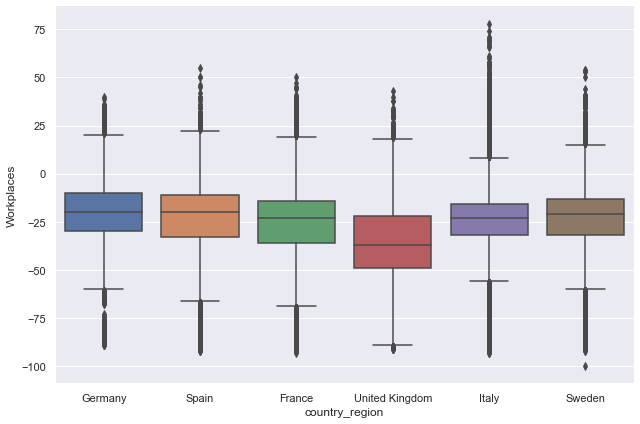

In [48]:
# Box plot of workplaces mobility trends in selected countries

sns.catplot(
    x="country_region",
    y="Workplaces",
    kind="box",
    data=mobility_trends_countries,
    height=6,
    aspect=1.5,
);

# Changing figure appearance

`Seaborn` provides a range of capabilities to change figure appearance. For example, the figure below set a theme that controls color, font, and other features. The `set_theme()` function applies globally to the entire notebook so you do not need to execute again the function unless you want to change the theme. We also change the y and x axes labels.

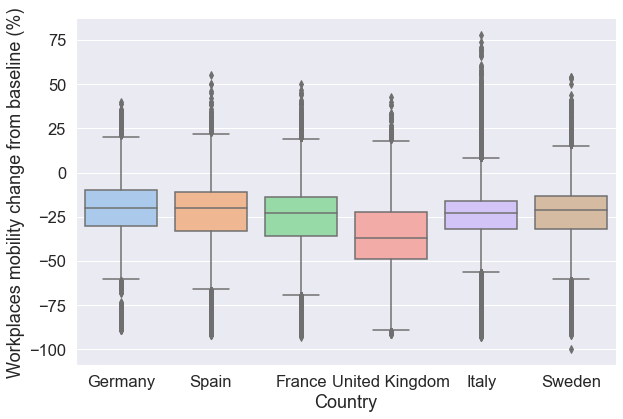

In [49]:
# Control the scale of plot elements, font
sns.set_theme(context="notebook", style="darkgrid", palette="pastel", font_scale=1.5)

grid = sns.catplot(
    x="country_region",
    y="Workplaces",
    kind="box",
    data=mobility_trends_countries,
    height=6,
    aspect=1.5,
)

# Change the labels of the two axes
grid.set(xlabel="Country", ylabel="Workplaces mobility change from baseline (%)");

You can access information about the `catplot` function by typing `help(sns.catplot)` or `sns.catplot?` 

In [100]:
sns.catplot?

Signature:
sns.catplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    row=None,
    col=None,
    col_wrap=None,
    estimator=<function mean at 0x7fca50384a60>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    kind='strip',
    height=5,
    aspect=1,
    orient=None,
    color=None,
    palette=None,
    legend=True,
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The ``kind``
parameter selects the underlying axes-level function to use:

Categorical scatterplots:

- :func:`stripplot` (with ``kind="strip"``; the default)
- :func:`swarmplot` (

# Wide and long data format

In the original data, each mobility category is a separate column, which is known as wide data format. Wide data format is easy to read but restricts us to plotting only one mobility category at a time (unless we employ a `for` loop). We can plot all mobility categories simultaneously in `seaborn` after we reshape our data from wide format to long format. Long data format will have one column for all six mobility categories and one column for the values of those categories.

Below is a Pandas schematic of wide (left) and long format data (right):

[Reshaping data](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png" title='Pandas DataFrame' width="600" height="300"/>

Reshaping our mobility categories from wide to long format using the pandas [`melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function. The function transforms a DataFrame into a format where one or more columns are identifier variables (id_vars), while other columns (value_vars) are turned into a long format, returning columns, ‘variable’ and ‘value’. In our example, id_vars are`country_region` and `date`, and value_vars are the six mobility categories. The `melt` function takes the following parameters:
* `DataFrame` — your pandas DataFrame
* `id_vars` — a list of identifier variables
* `value_vars` — a list of variables to turn into long format

The code below also removes NaN, standing for Not a Number, using the method `dropna()`

:::{tip}

Instead of manually creating a list of all six column labels for the six mobility categories of interest, you can obtain the list by typing in

```
mobility_trends_countries.columns[9:15]
```

where the attribute `columns` returns the column labels of the DataFrame `mobility_trends_countries` and the indices in square brackets [9:15] specify the location of the mobility categories' columns of interest. The command returns the labels in the following format:

```
Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')
```
:::

In [51]:
# From wide to long format using the function melt
mobility_trends_countries_long = pd.melt(
    mobility_trends_countries,
    id_vars=["country_region", "sub_region_1", "date"],
    # The columns 'date' and 'sub_region_1' are not needed for the box
    # plots below but we will need the two variables in subsequent tasks.
    value_vars=mobility_trends_countries.columns[9:15],
).dropna()

mobility_trends_countries_long

country_region            sub_region_1       date           variable  \
502            Germany       Baden-Württemberg 2020-02-15  Retail_Recreation   
503            Germany       Baden-Württemberg 2020-02-16  Retail_Recreation   
504            Germany       Baden-Württemberg 2020-02-17  Retail_Recreation   
505            Germany       Baden-Württemberg 2020-02-18  Retail_Recreation   
506            Germany       Baden-Württemberg 2020-02-19  Retail_Recreation   
...                ...                     ...        ...                ...   
2916551         Sweden  Västra Götaland County 2021-06-24        Residential   
2916552         Sweden  Västra Götaland County 2021-06-25        Residential   
2916555         Sweden  Västra Götaland County 2021-06-28        Residential   
2916556         Sweden  Västra Götaland County 2021-06-29        Residential   
2916557         Sweden  Västra Götaland County 2021-06-30        Residential   

         value  
502        6.0  
503       23.0  
504        0.0  
505        4.0  
506        2.0  
...        ...  
2916551    2.0  
2916552    9.0  
2916555    5.0  
2916556    4.0  
2916557    4.0  

[2446789 rows x 5 columns]

The resulting DataFrame `mobility_trends_countries_long` contains two new columns: `variable` containing the six mobility categories per country per date, and `value` containing the values of those categories (percent change from baseline).  

# Multi-plot visualisations

To plot the six mobility categories simultaneously in a multi-plot, we simply add the parameter `col` and provide as an argument our categorical variable labeled `variable`. Our six mobility categories will be plotted in a grid of six columns. Setting the `col_wrap` parameter to 2 will plot the six variables in two columns, spanning three rows. We change the kind of plot we would like to draw to [`boxen`](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot).

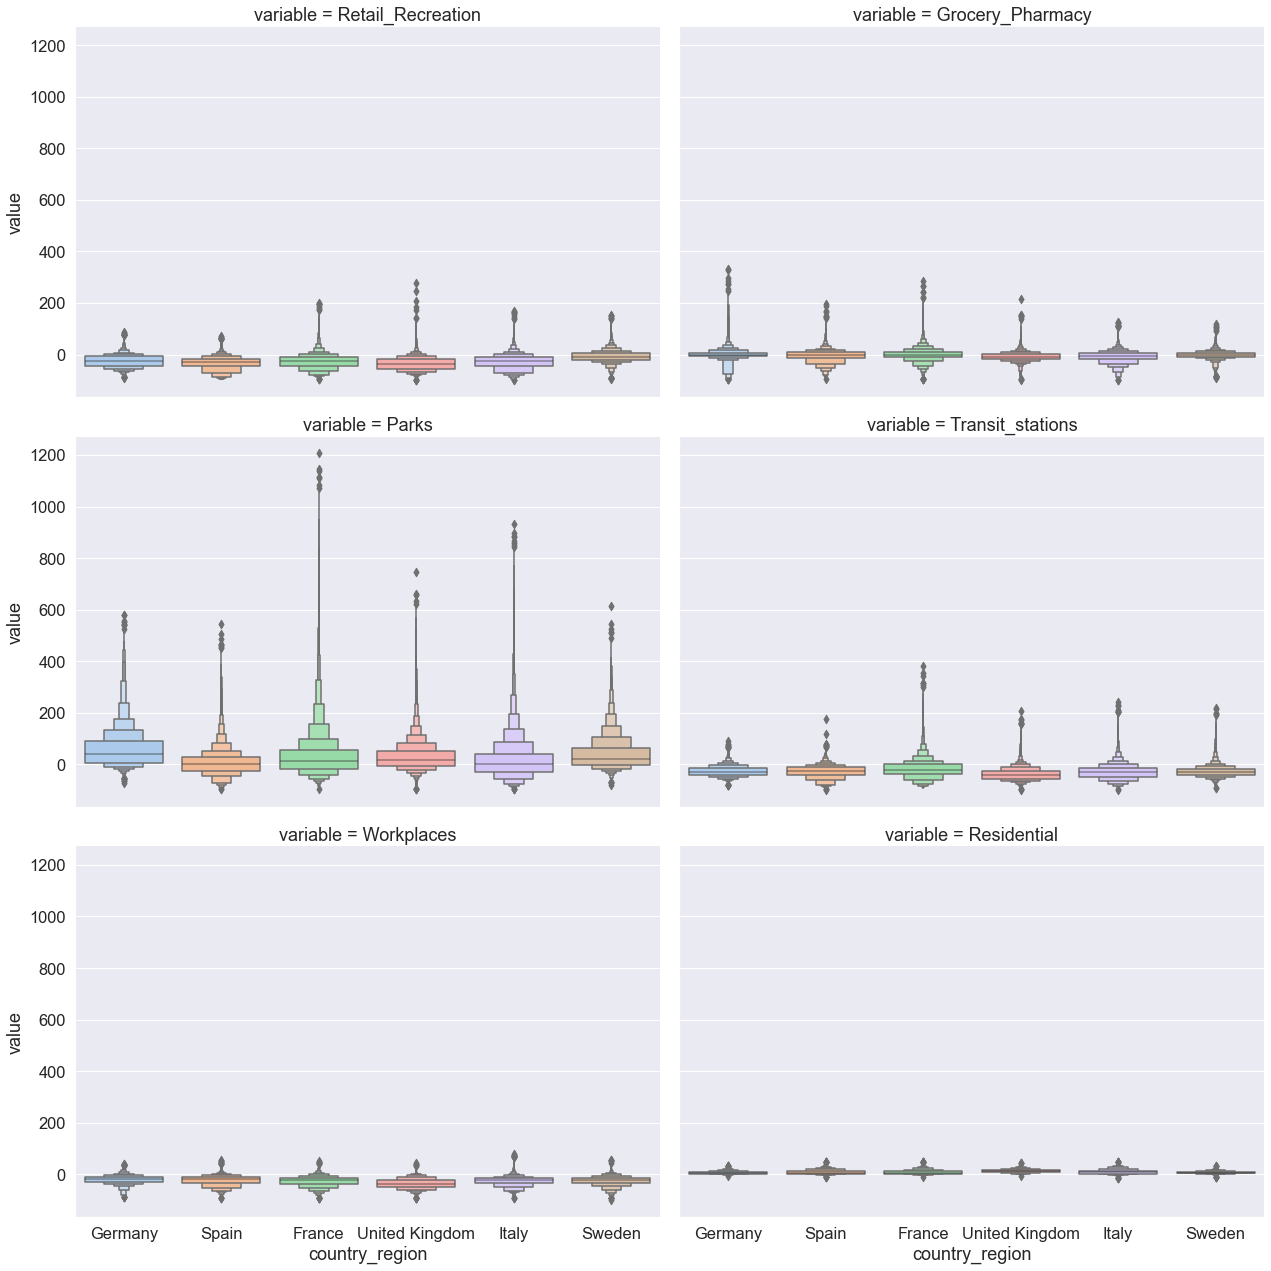

In [52]:
# Differences in multiple mobility trends across selected countries
g = sns.catplot(
    x="country_region",
    y="value",
    col="variable",
    col_wrap=2,
    kind="boxen",
    height=6,
    aspect=1.5,  # control plot size
    data=mobility_trends_countries_long,
)

The plots above have one deficiency — different mobility categories share the same `y` axis. Because the axis range is predominantly determined by one mobility category (parks mobility) and its wide distribution, the plots barely display the way in which the six countries differ with respect to the remaining five mobility category. We resolve this problem by simply setting the parameter `sharey` to False and redrawing the figure.

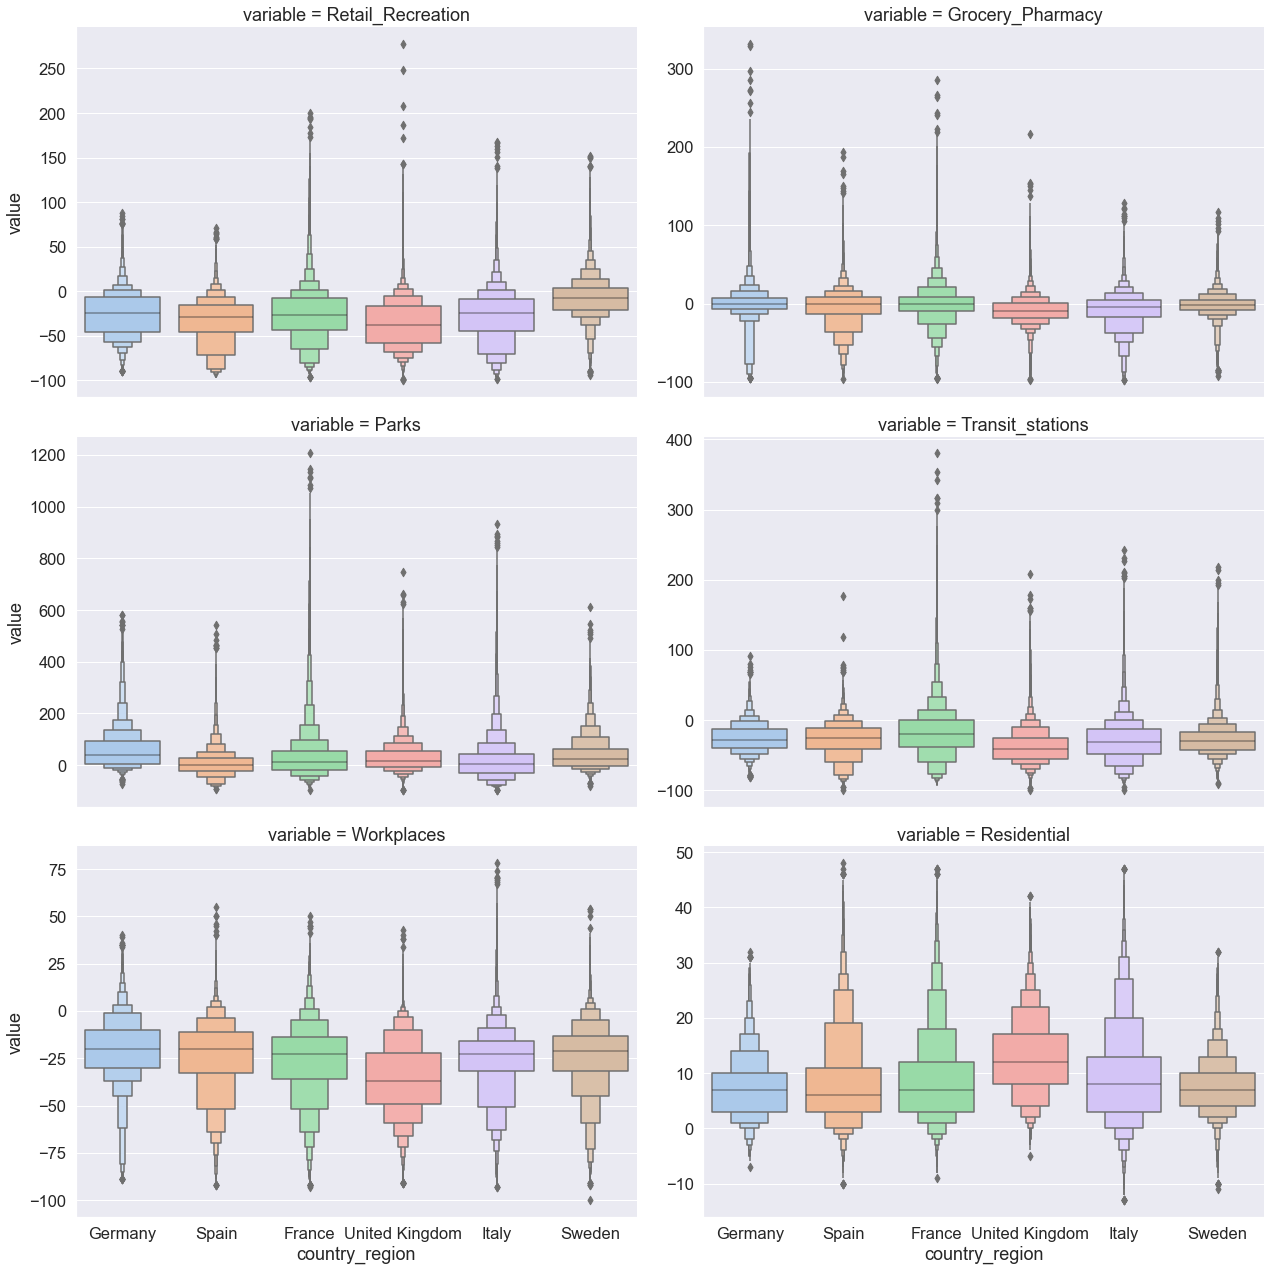

In [53]:
sns.catplot(
    x="country_region",
    y="value",
    col="variable",
    col_wrap=2,
    kind="boxen",
    height=6,
    aspect=1.5,  # control plot size
    sharey=False,  # set different y axes for each plot
    data=mobility_trends_countries_long,
);

#  Hands-on exercise

Visualise mobility categories for a different set of countries of your choice. Update the labels and interpret your results. Employ a different kind of `catplot`, for example `violin`.

# RQ2: How do mobility trends change over time?

Our graphics so far summarised the time series mobility data without visualising longitudinal trends. In this section, you will learn how to visualise time series data in order to characterise mobility trends across countries and along time.

# Visualising time series data
We will use the function `relplot()` for drawing relational plots onto a multi-plot grid. Using the function, we will produce six plots for the six mobility categories. Each plot will represent the relationship between two variables, time and mean mobility percent change from baseline.

Let's have a look at the parameters:
* `x`, `y` — Numerical variables on the x and y axes. We plot `date` on the x axis and the `value` of percent mobility change from baseline on the y axis. 
* `hue` — Grouping variable that will map elements to different colors. Our grouping variable is `country_region`, meaning that the line for each country will be colored differently.
* `kind` — Kind of plot to draw, with two options: `scatter` (default) and `line`. We use `line` in order to visualise the trend in data.

The resulting plot shows the mean percent change and 99% confidence intervals for each mobility category. The 99% CI are computed using bootstrapping. Observations are sorted by time.

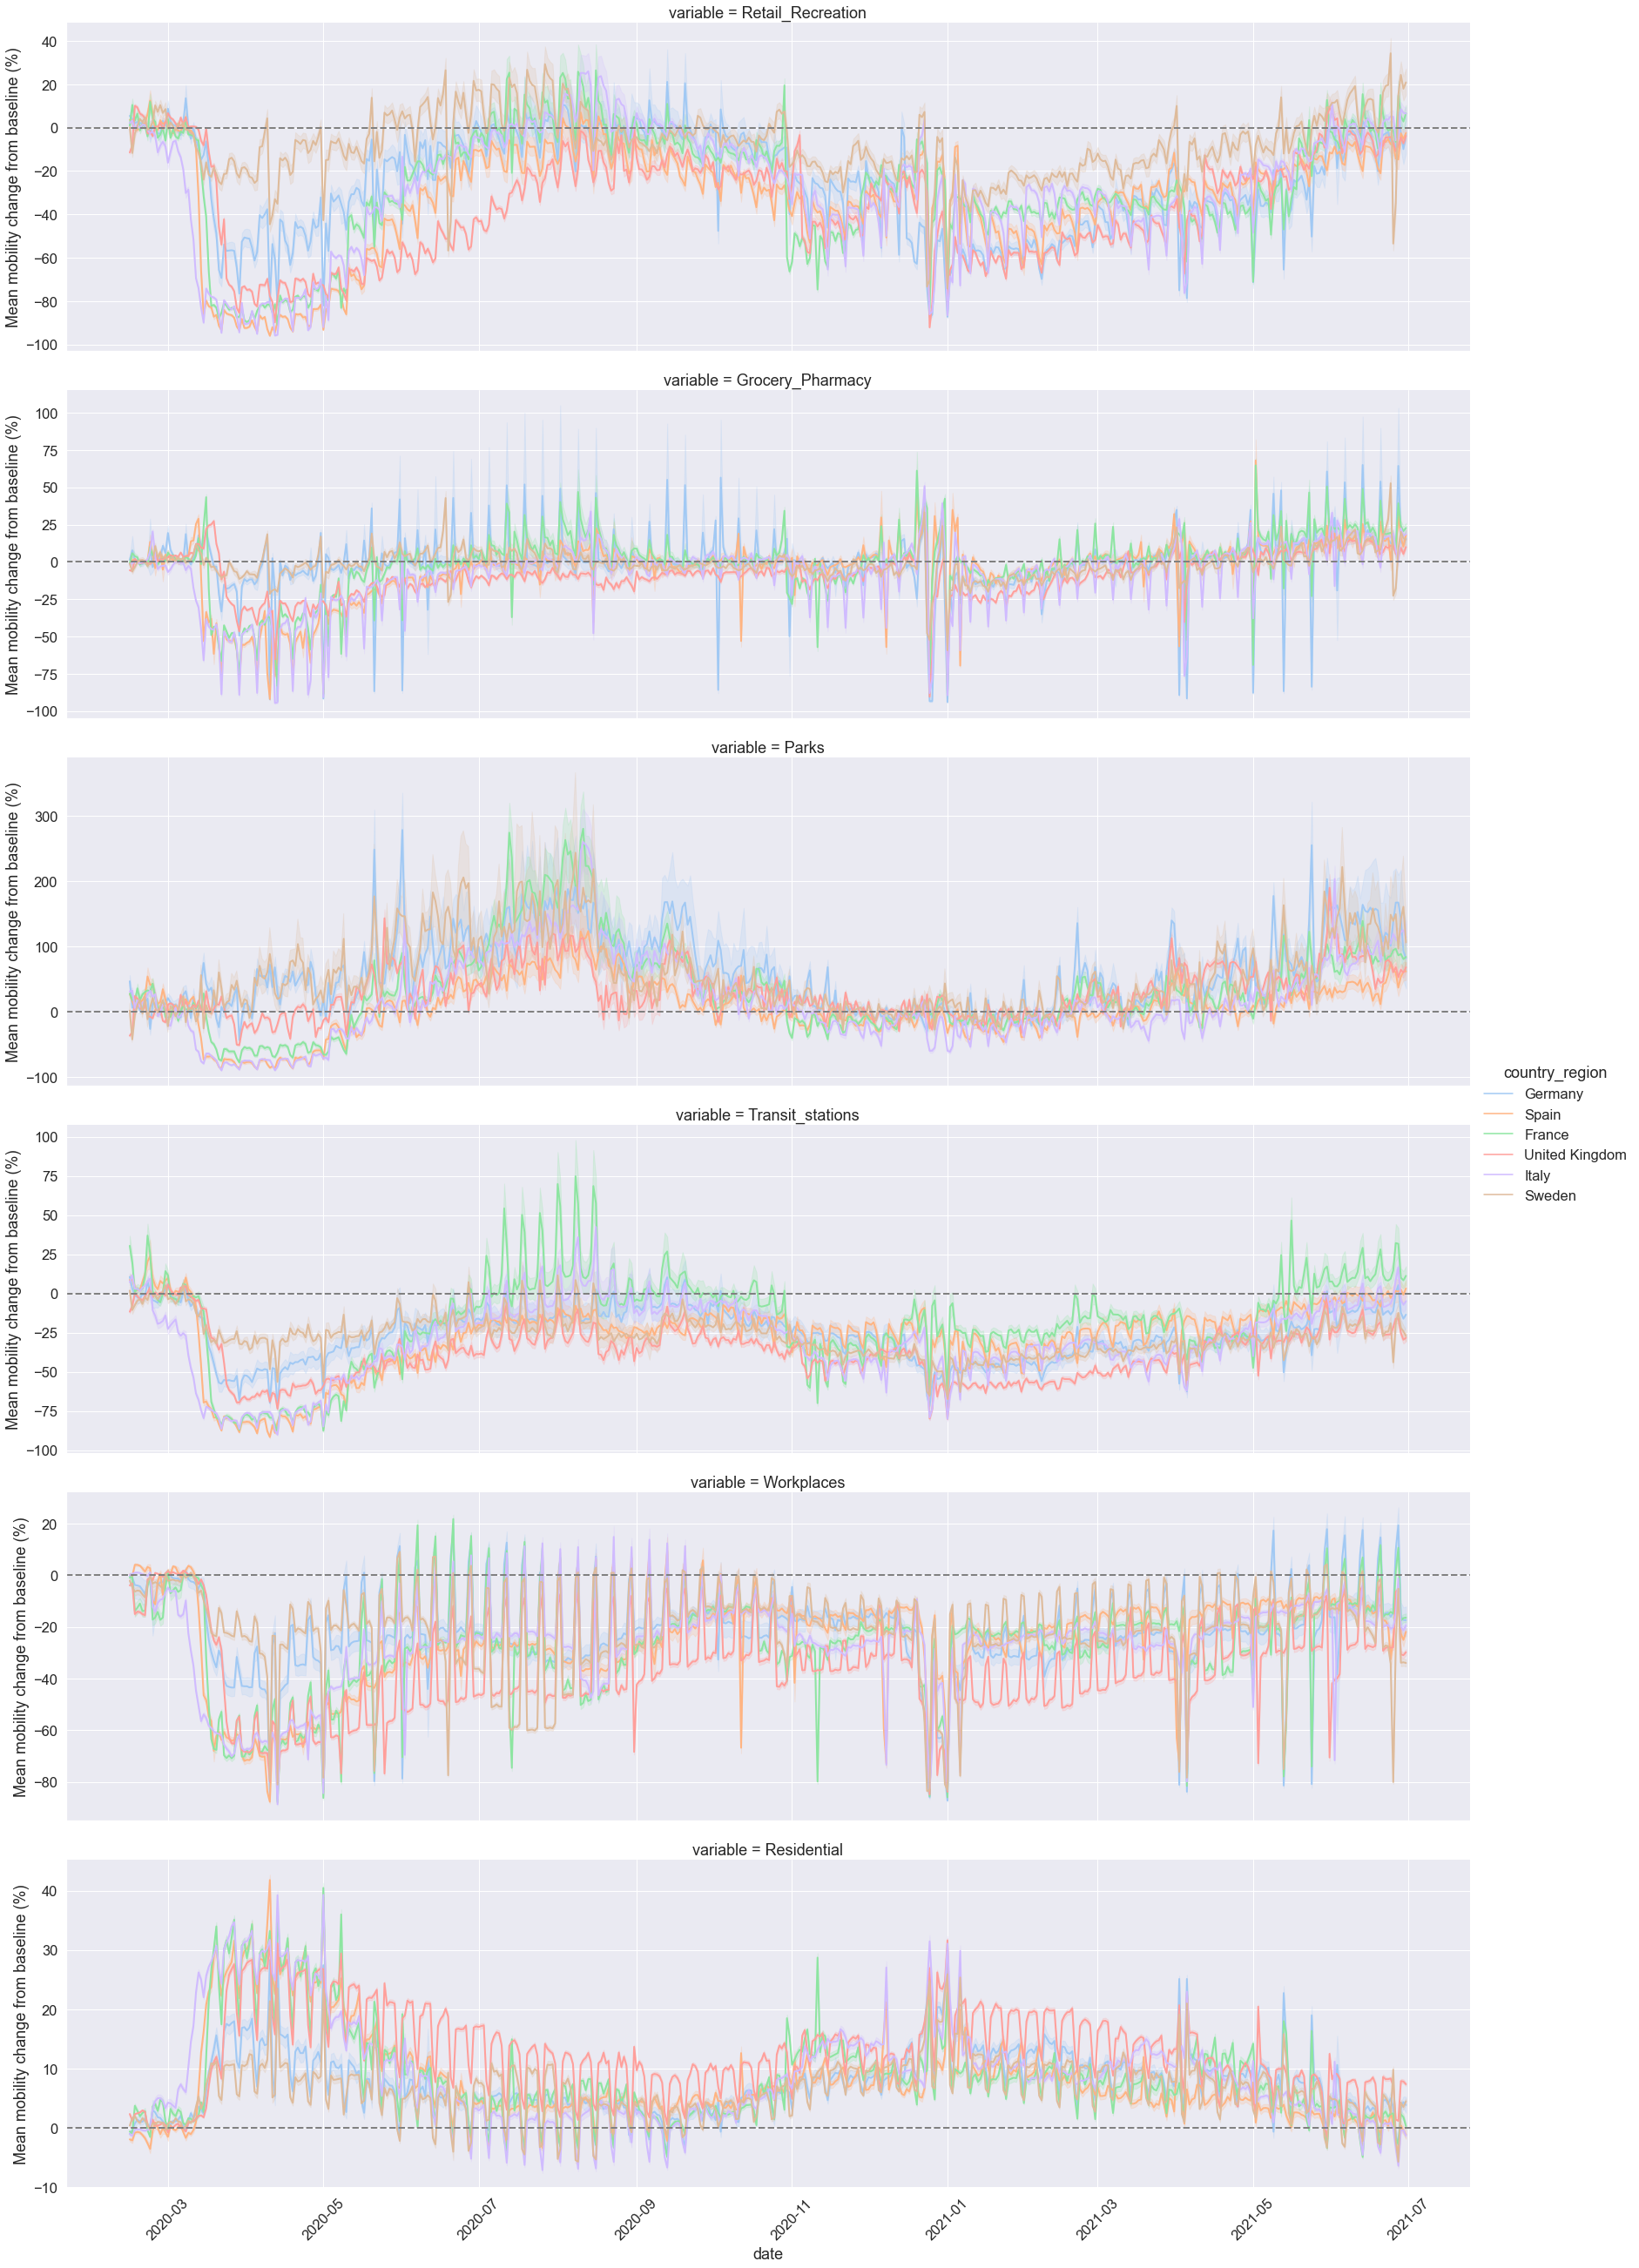

In [54]:
# Plot daily mobility trends across mobility categories and countries of interest

grid = sns.relplot(
    x="date",
    y="value",
    hue="country_region",
    col="variable",
    col_wrap=1,
    height=6,
    aspect=4,
    linewidth=2,
    ci=99,
    seed=42,
    facet_kws={"sharey": False, "sharex": True},
    kind="line",
    data=mobility_trends_countries_long,
)

grid.set(ylabel="Mean mobility change from baseline (%)")
grid.set_xticklabels(rotation=45)

# For each plot, draw a horizontal line at y = 0 representing the baseline
for ax in grid.axes.flat:
    ax.axhline(color="gray", linestyle="--", lw=2)

# Bootstrapping for inference

We calculated above a point estimate — mean per cent mobility change from baseline — for each mobility category per day and per country between March 2020 and May 2021. The point estimate likely contains some error and thus, it rarely captures the exact population parameter. Therefore, in addition to our point estimate, we need to compute a range of plausible values that, with some degree of certainty, contains the true population parameter. This range of plausible values is called a _confidence interval_. Confidence intervals are typically constructed using confidence levels of 95% or 99%.

We compute the 99% confidence intervals around the mean, representing the uncertainty of the mean estimate. The 99% confidence interval is a range of plausible values that you can be 99% certain contain the true mean of the population parameter.

To construct confidence intervals on the mean (and other sample statistics), `Seaborn` uses a procedure called bootstrapping. The bootstrapping is a resampling method of statistical inference that is alternative to the classical approach of hypothesis testing. (Other resampling methods include random permutation.) The bootstrap method uses the original sample of our data to generate another random sample that resembles the population, following these steps: 

> * Treat the original sample as if it were the population.
> * Draw from the sample, at random with replacement, the same number of times as the original sample size.
>
> <img src="https://inferentialthinking.com/_images/Bootstrap_26_0.png" title='Pandas DataFrame' width="600" height="300"/>
>
> Source: Ani Adhikari and John DeNero (with David Wagner and Henry Milner). [Computational and Inferential Thinking: The Foundations of Data Science.](https://inferentialthinking.com/chapters/intro.html)

<br>

In our example, the data for each mobility category and day within a country is treated as a sample on which bootstrapping on the mean is performed. After each bootstrap resample, the mean is computed, generating a distribution from where the confidence intervals for the mean are constructed. 

When you compute bootstrap confidence intervals in `Seaborn`, you can set the following parameters: 

* `ci` — Confidence level that will determine the size of the confidence interval. Commonly used confidence levels include 95% and 99%. The default confidence level in the current version of `seaborn` is 95%.
* `n-boot` — Number of bootstrap resamples. By default, `Seaborn` uses 1000 bootstrap resamples for computing the confidence intervals. You could set a greater number of bootstrap resamples — for example 10,000, by typing `n_boot=10000` — but keep in mind that increasing the number of resamples can be time-consuming for large data sets.
* `seed` — Seed reproducible bootstrapping. The easiest way is to specify an integer.

There are many good introductions to resampling methods (including bootstrapping) and inference. See the section on [the Bootstrap](https://inferentialthinking.com/chapters/13/2/Bootstrap.html) in Ani Adhikari and John DeNero (with David Wagner and Henry Milner). [Computational and Inferential Thinking: The Foundations of Data Science](https://inferentialthinking.com/chapters/intro.html). Another useful resource is David Diez, Christopher Barr, Mine Cetinkaya-Rundel. [Introductory Statistics with Randomization and Simulation](https://www.openintro.org/book/isrs/), OpenIntro. See also the informative and entertaining talk by John Rauser [Statistics Without the Agonizing Pain](https://www.youtube.com/watch?v=5Dnw46eC-0o), Strata + Hadoop 2014, on using resampling methods for making inference.

# RQ3: How have mobility trends differed across UK lockdowns?

Our next research question aims to explore differences in mobility trends across the three national lockdowns in the United Kingdom. Because the three lockdowns brought different measures, restrictions, and regulations, differences in mobility trends should not be interpreted as a direct indication of compliance or non-compliance with lockdown rules.

We will use the first three weeks of each lockdown to compare the three lockdowns. Let's select the data for the first lockdown (24 March 2020 — 13 April 2020), second lockdown (5 November 2020 — 25 November 2020), and third lockdown (6 January 2021 — 26 January 2021) in the United Kingdom.  

In [55]:
# Create three new DataFrames, each containing a subset of data about
# the first three weeks of the respective lockdown

first_lockdown_UK = mobility_trends_countries_long[
    (mobility_trends_countries_long["country_region"] == "United Kingdom")
    & (mobility_trends_countries_long["date"] >= "2020-03-24")
    & (mobility_trends_countries_long["date"] <= "2020-04-13")
]

second_lockdown_UK = mobility_trends_countries_long[
    (mobility_trends_countries_long["country_region"] == "United Kingdom")
    & (mobility_trends_countries_long["date"] >= "2020-11-05")
    & (mobility_trends_countries_long["date"] <= "2020-11-25")
]

third_lockdown_UK = mobility_trends_countries_long[
    (mobility_trends_countries_long["country_region"] == "United Kingdom")
    & (mobility_trends_countries_long["date"] >= "2021-01-06")
    & (mobility_trends_countries_long["date"] <= "2021-01-26")
]

In [56]:
# Show data about the first national lockdown in the UK
# (The dataframes for the other two lockdowns have the same number of columns)
first_lockdown_UK

country_region   sub_region_1       date           variable  value
95896    United Kingdom  Aberdeen City 2020-03-24  Retail_Recreation  -75.0
95897    United Kingdom  Aberdeen City 2020-03-25  Retail_Recreation  -78.0
95898    United Kingdom  Aberdeen City 2020-03-26  Retail_Recreation  -80.0
95899    United Kingdom  Aberdeen City 2020-03-27  Retail_Recreation  -80.0
95900    United Kingdom  Aberdeen City 2020-03-28  Retail_Recreation  -87.0
...                 ...            ...        ...                ...    ...
2734968  United Kingdom           York 2020-04-06        Residential   28.0
2734969  United Kingdom           York 2020-04-07        Residential   28.0
2734970  United Kingdom           York 2020-04-08        Residential   28.0
2734971  United Kingdom           York 2020-04-09        Residential   28.0
2734972  United Kingdom           York 2020-04-10        Residential   33.0

[48902 rows x 5 columns]

# Visualising lockdowns' mobility as barplots

Plot mean mobility change for the six mobility categories during the first lockdown in the UK using the Seaborn function `catplot()`. Error bars represent 95% confidence intervals. 

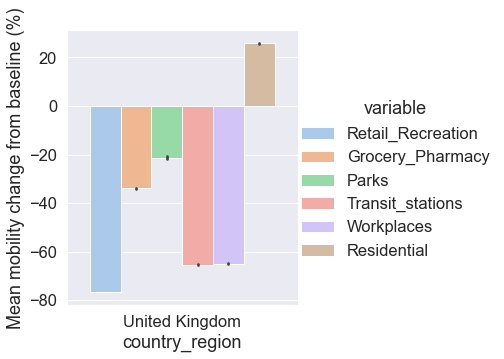

In [57]:
grid = sns.catplot(
    kind="bar", x="country_region", y="value", hue="variable", data=first_lockdown_UK
)
grid.set(ylabel="Mean mobility change from baseline (%)")
# grid.set(ylim=(-80, 40)); uncomment to set the y axis to a particular range of values

Ideally, we would like to plot the three lockdowns as a multi-plot. To achieve this, we first concatenate the three DataFrames into one DataFrame using the Pandas `concat()` function. In addition, to add an identifier for each of three DataFrames in the new DataFrame, we specify their labels as a list for the parameter `keys`. We use the Pandas method `reset_index()` to add the three identifiers of the original lockdown DataFrames as a column 'level_0' in the new DataFrame.

In [58]:
lockdowns_dataframes = [first_lockdown_UK, second_lockdown_UK, third_lockdown_UK]
three_lockdowns_UK = pd.concat(
    lockdowns_dataframes,
    keys=["first_lockdown_UK", "second_lockdown_UK", "third_lockdown_UK"],
).reset_index()
three_lockdowns_UK

level_0  level_1  country_region   sub_region_1       date  \
0       first_lockdown_UK    95896  United Kingdom  Aberdeen City 2020-03-24   
1       first_lockdown_UK    95897  United Kingdom  Aberdeen City 2020-03-25   
2       first_lockdown_UK    95898  United Kingdom  Aberdeen City 2020-03-26   
3       first_lockdown_UK    95899  United Kingdom  Aberdeen City 2020-03-27   
4       first_lockdown_UK    95900  United Kingdom  Aberdeen City 2020-03-28   
...                   ...      ...             ...            ...        ...   
150176  third_lockdown_UK  2735259  United Kingdom           York 2021-01-22   
150177  third_lockdown_UK  2735260  United Kingdom           York 2021-01-23   
150178  third_lockdown_UK  2735261  United Kingdom           York 2021-01-24   
150179  third_lockdown_UK  2735262  United Kingdom           York 2021-01-25   
150180  third_lockdown_UK  2735263  United Kingdom           York 2021-01-26   

                 variable  value  
0       Retail_Recreation  -75.0  
1       Retail_Recreation  -78.0  
2       Retail_Recreation  -80.0  
3       Retail_Recreation  -80.0  
4       Retail_Recreation  -87.0  
...                   ...    ...  
150176        Residential   23.0  
150177        Residential   16.0  
150178        Residential   14.0  
150179        Residential   21.0  
150180        Residential   22.0  

[150181 rows x 7 columns]

We now visualise as a multi-plot grid the mean mobility trends and 95% CI for the three lockdowns in the United Kingdom. We specify the new categorical variable `level_0` to determine the faceting of the multi-plot grid.

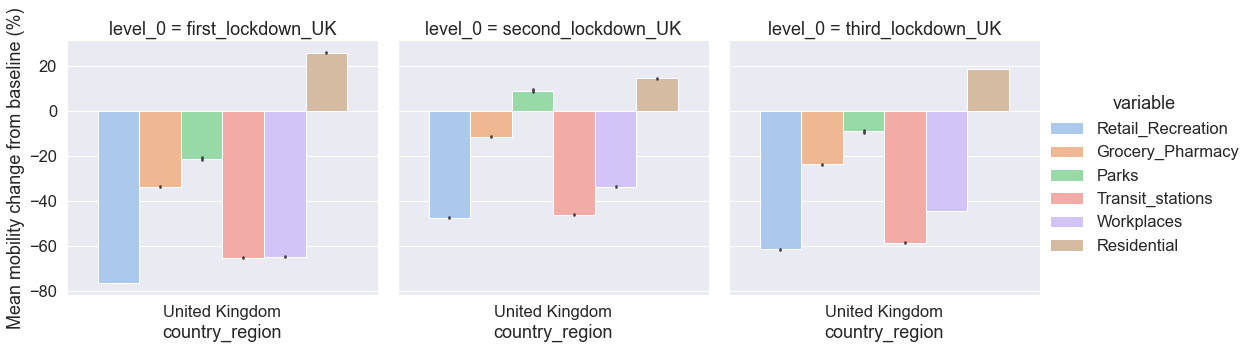

In [59]:
# Display the three lockdowns as a catplot multi-plot
grid = sns.catplot(
    kind="bar",
    x="country_region",
    y="value",
    hue="variable",
    col="level_0",
    data=three_lockdowns_UK,
)
grid.set_ylabels("Mean mobility change from baseline (%)")

As a general tendency, the plots indicate that, on average, changes of mobility (compared to the baseline period in early 2020) during the first lockdown were greater that changes of mobility during the third lockdown, and both were greater than changes of mobility during the second lockdown.

## Discussion activity

Different rules and restrictions were in place during the three lockdowns. Let's discuss how those differences in restrictions were associated with differences in mobility during the three lockdowns across mobility categories. 

# RQ4: How have mobility trends differed across UK counties during the third lockdown?

We will now explore mobility trends across mobility categories and counties in the United Kingdom during the third lockdown. We employ the Seaborn `catplot()` function using one of our DataFrame 'third_lockdown_UK'. We use the variable called `variable`, which contains the labels of the six mobility categories to determine the faceting of the multi-plot grid. The UK counties are on the vertical axis and the mean values of mobility change from baseline (%) are on the horizontal axis. The `violin` plot function computes, for each pair of country and mobility category, the mean mobility change and the distributions of the mobility percent change.

# Multi-plot visualisations

Note the simplicity of the code that produces the multi-plot and the richness of information it provides.

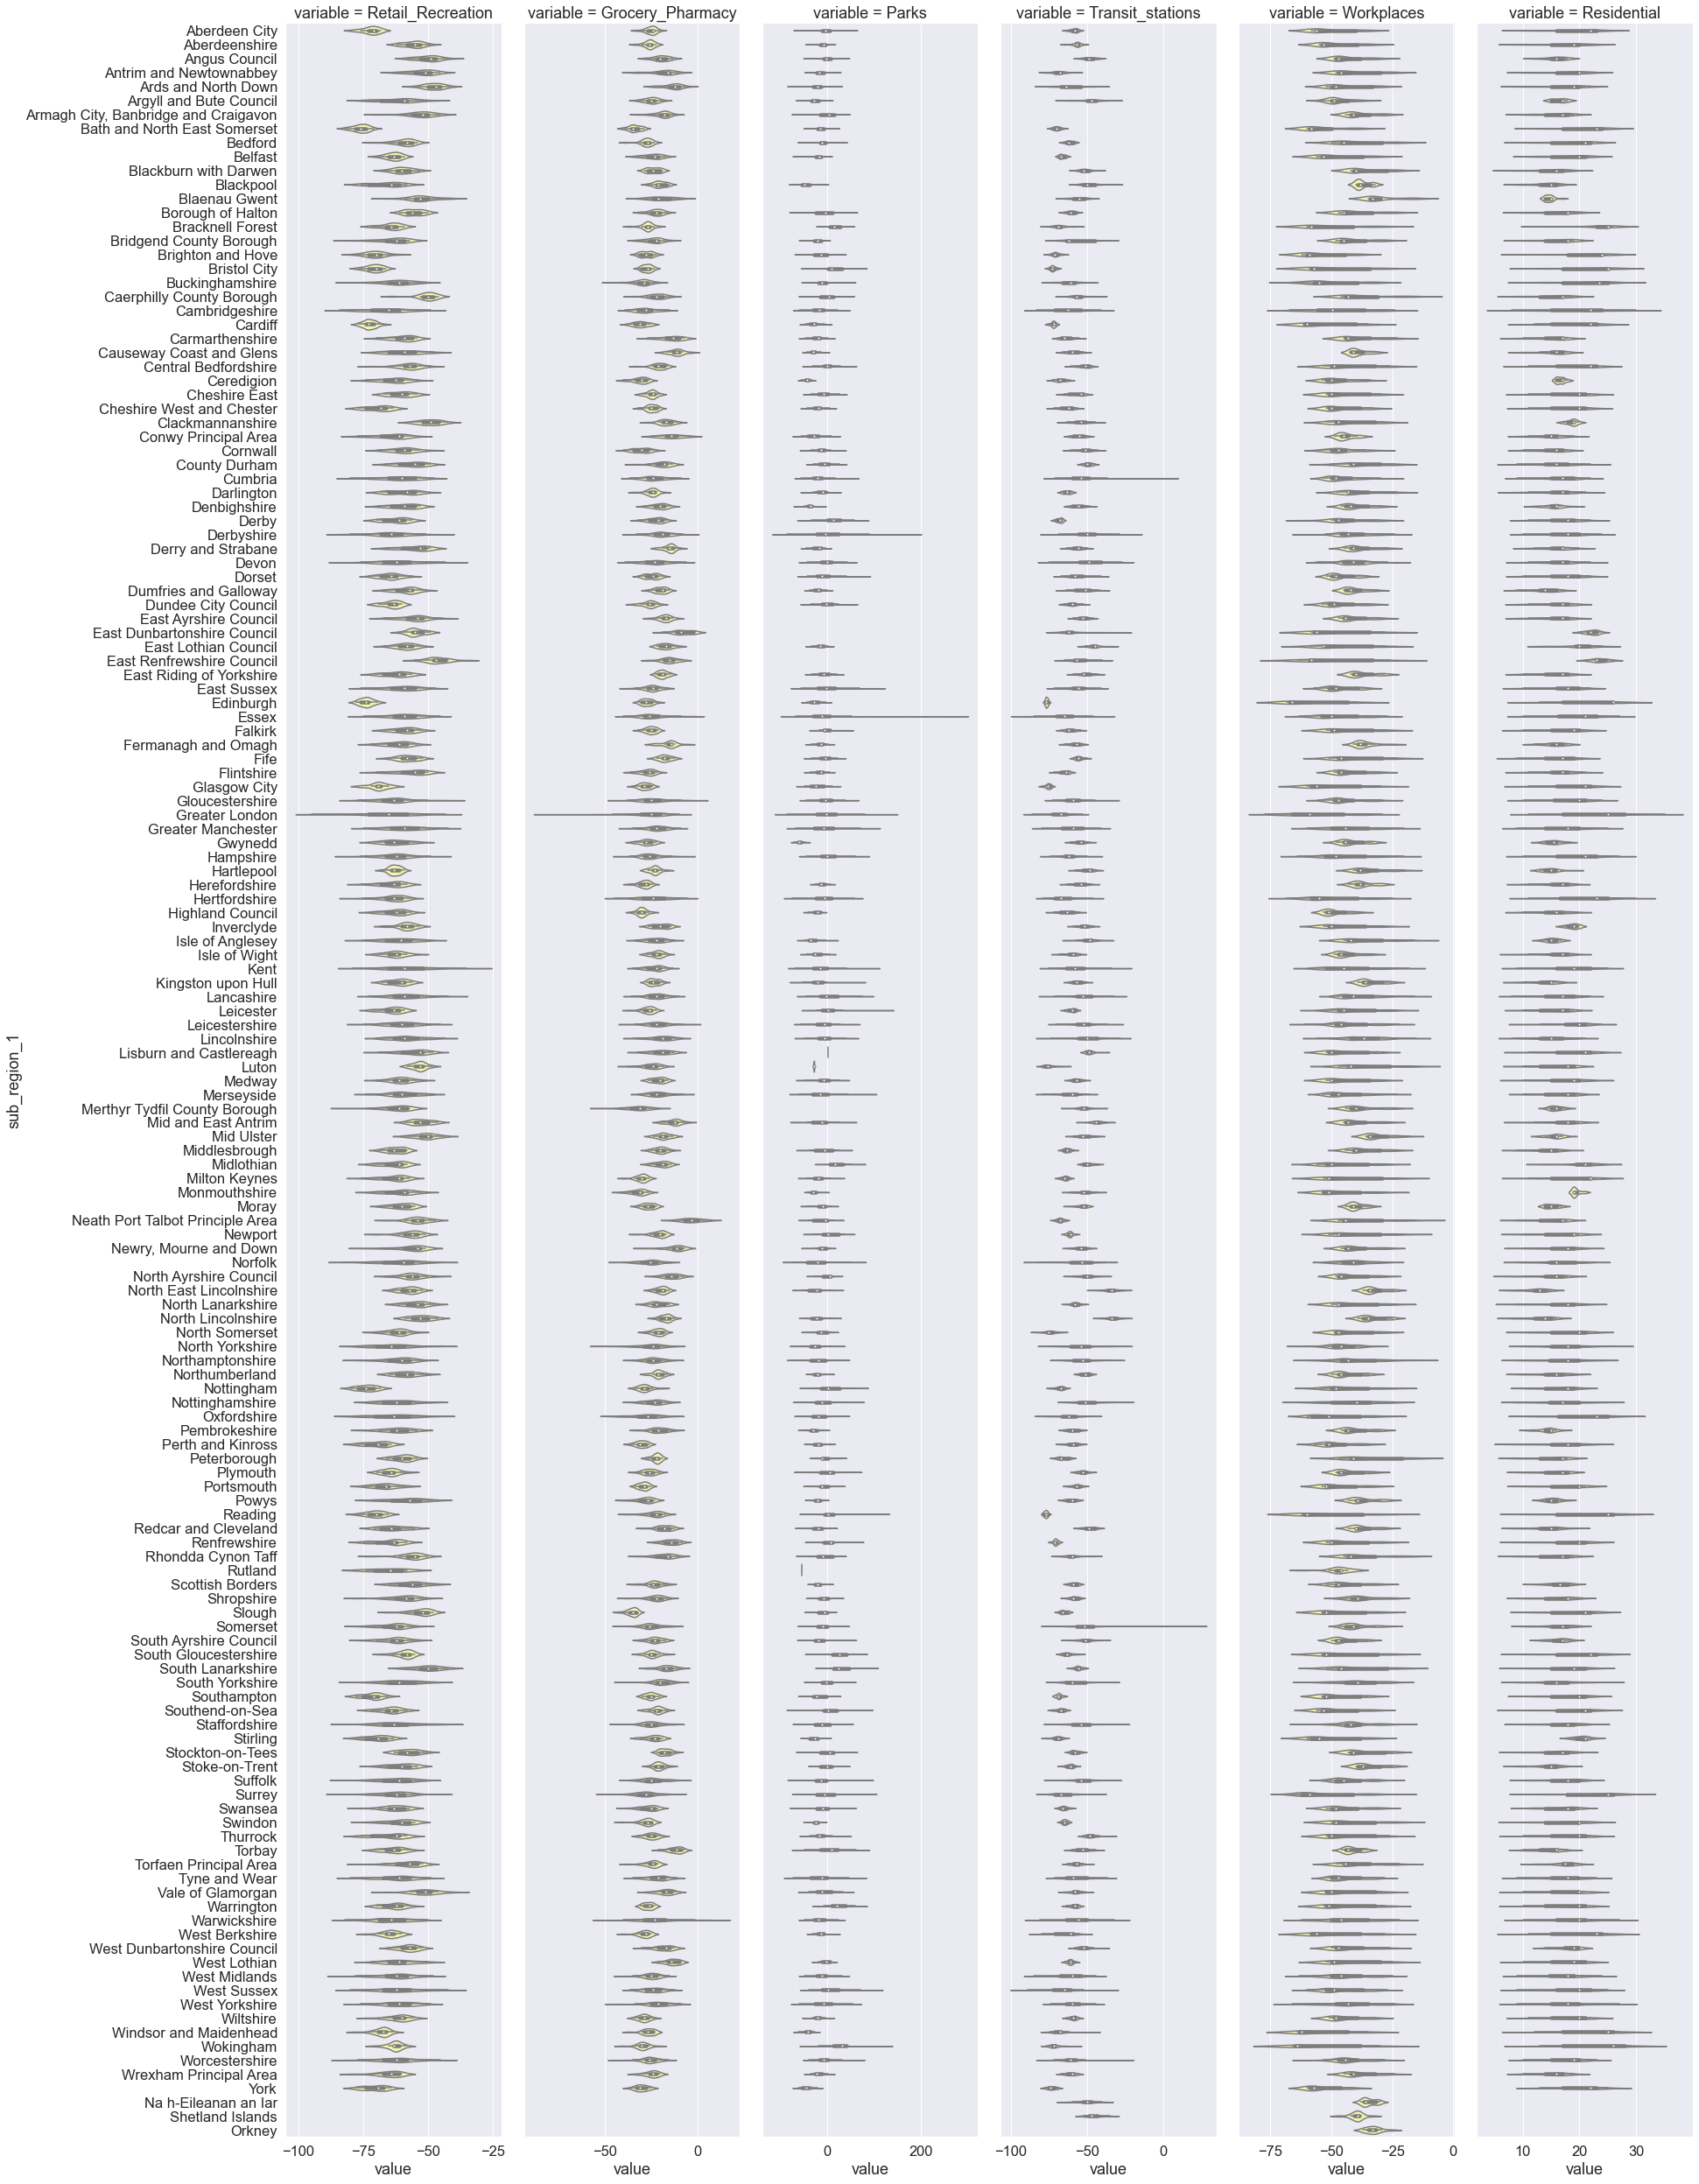

In [60]:
sns.catplot(
    x="value",
    y="sub_region_1",
    col="variable",
    kind="violin",
    sharex=False,
    height=35,
    aspect=0.13,
    color="y",
    data=third_lockdown_UK,
);

The above plots are slightly difficult to interpret because the values of mean mobility are not sorted. An elegant approach to sorting would be to employ Pandas functionality and then pass the sorted mean mobility values to a Seaborn plot.   

# Split-apply-combine

To calculate the mean mobility change per both UK county and mobility category, we first need to split the data into groups where each _mobility category_ per _county_ is a group. Then, second, we will apply a function to calculate the mean for each of the split groups (mobility category per county) such that the daily values over the lockdown period for each mobility category per county will be summarised into a single mean value. Third, we will combine the individual calculations for each split group into a single DataFrame. The procedure is known as _split-apply-combine_. We will use the Pandas method [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) to perform the procedure on the mobility trends data.

# Summarising data by groups
We first specify the variables to be used to determine the groups. In our example, these are 'variable' and 'sub_region_1', resulting in 876 groups (6 mobility categories times 146 UK counties). Because we want to split the data into groups by two variables, we pass the variables within the `groupby()` methods as a list '['variable', 'sub_region_1']'. We then specify the variable on which we want to perform the calculation (in our case, take the mean) and compute the mean for each of the 876 groups using the `mean()` method. We use the Pandas method `reset_index()` at the end of the command in order to convert the output (from Series) to a DataFrame. The output DataFrame 'third_lockdown_UK_mean' contains three columns: mobility categories ('variable'), counties ('sub_region_1'), and the mean ('value'). Each row is a pair of mobility category and county, and their respective mean mobility change calculated over the three weeks' period.

In [61]:
# Compute grouped means using the Pandas gropupby() method
third_lockdown_UK_mean = (
    third_lockdown_UK.groupby(["variable", "sub_region_1"])["value"]
    .mean()
    .reset_index()
)
third_lockdown_UK_mean

variable             sub_region_1      value
0    Grocery_Pharmacy            Aberdeen City -25.333333
1    Grocery_Pharmacy            Aberdeenshire -26.190476
2    Grocery_Pharmacy            Angus Council -19.714286
3    Grocery_Pharmacy  Antrim and Newtownabbey -18.523810
4    Grocery_Pharmacy      Ards and North Down -13.285714
..                ...                      ...        ...
871        Workplaces   Windsor and Maidenhead -54.952381
872        Workplaces                Wokingham -55.714286
873        Workplaces           Worcestershire -42.469388
874        Workplaces   Wrexham Principal Area -38.428571
875        Workplaces                     York -53.904762

[876 rows x 3 columns]

Our next step is to sort in decreasing order the UK counties within each mobility category by their values of mean mobility change. We use the Pandas method `sort_values()` to accomplish that:

In [62]:
third_lockdown_UK_mean_sorted = third_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_1", "variable", "value"]]
third_lockdown_UK_mean_sorted

sub_region_1          variable      value
737                  Blaenau Gwent        Workplaces -29.523810
803                     Mid Ulster        Workplaces -31.142857
816        North East Lincolnshire        Workplaces -32.523810
825                         Orkney        Workplaces -32.866667
818             North Lincolnshire        Workplaces -33.380952
..                             ...               ...        ...
25                      Ceredigion  Grocery_Pharmacy -31.142857
83                   Monmouthshire  Grocery_Pharmacy -32.095238
77   Merthyr Tydfil County Borough  Grocery_Pharmacy -32.761905
7     Bath and North East Somerset  Grocery_Pharmacy -34.095238
112                         Slough  Grocery_Pharmacy -35.523810

[876 rows x 3 columns]

We now plot the mean mobility change across UK counties sorted by Workplaces mobility in decreasing order. We can easily see, for example, that workplaces mobility was the most reduced in Edinburgh and Greater London. However, counties were sorted only in the Workplaces mobility category while in the remaining categories counties follow the ranking as specified in Workplaces mobility.

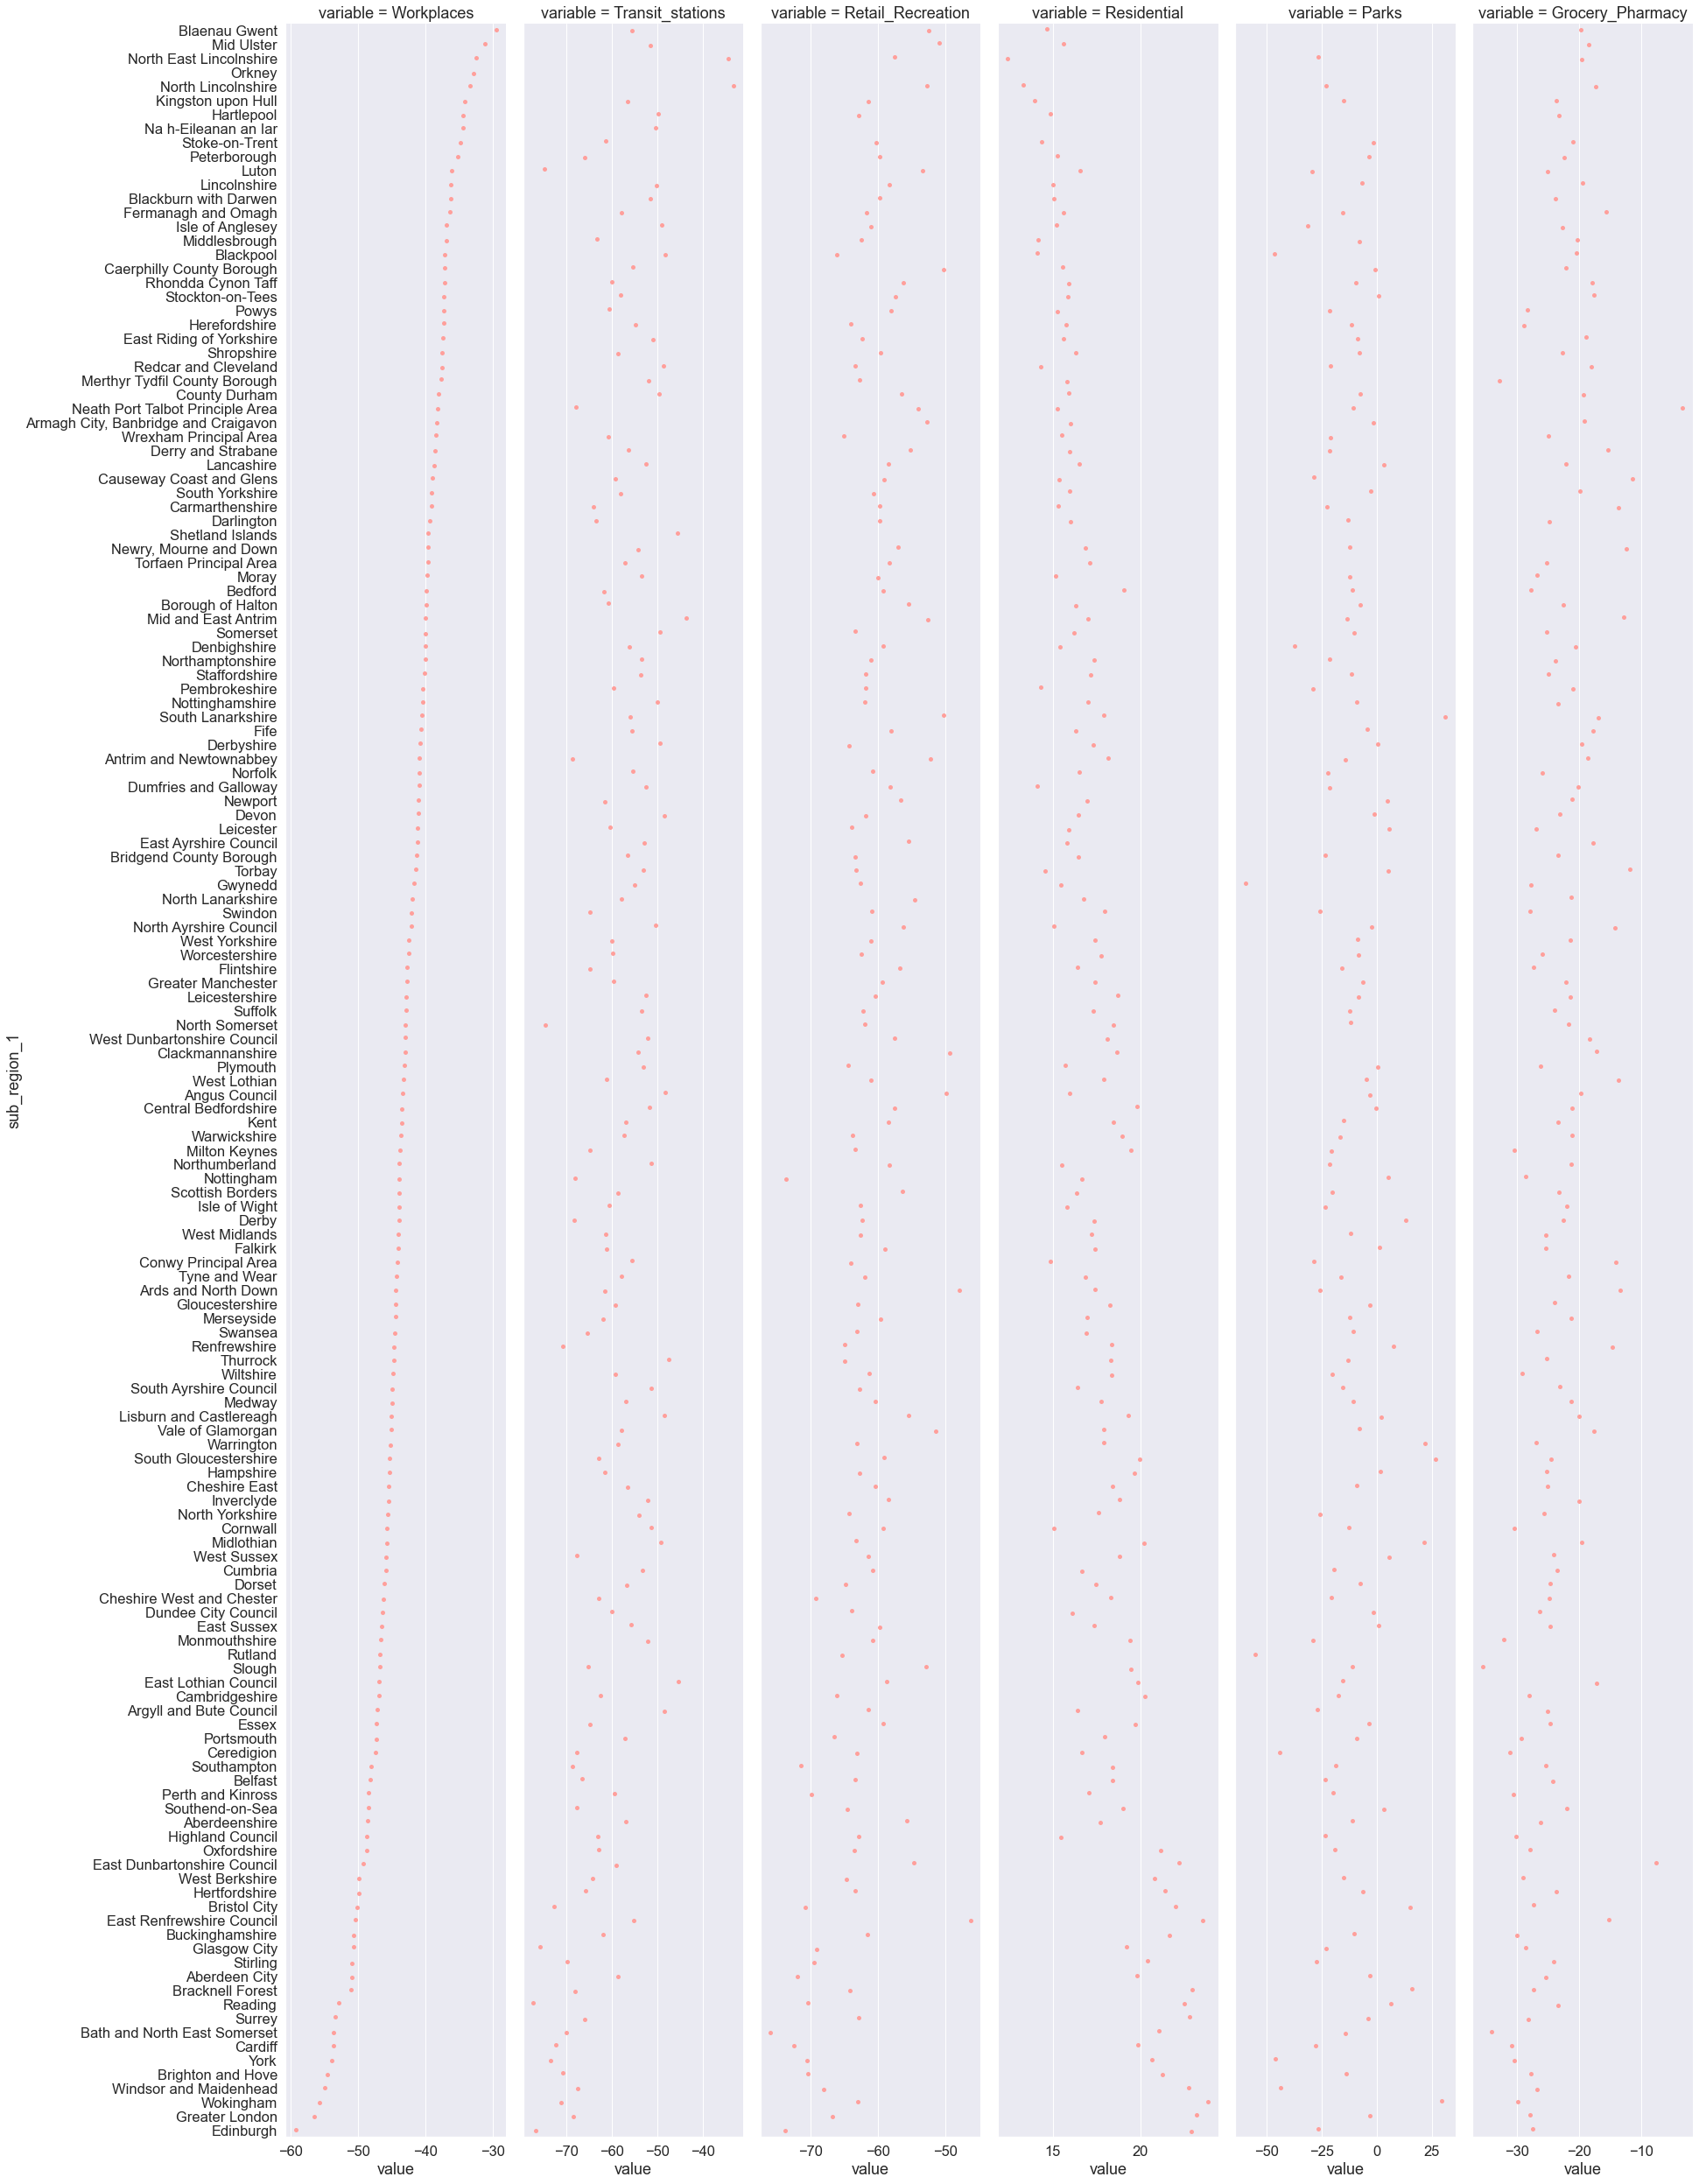

In [63]:
g = sns.catplot(
    x="value",
    y="sub_region_1",
    col="variable",
    kind="strip",
    sharex=False,
    height=35,
    aspect=0.13,
    color="r",
    data=third_lockdown_UK_mean_sorted,
)

Typically, we are interested in computing multiple descriptive statistics in addition to the mean (e.g., median). We can compute multiple descriptive statistics using the Pandas method `agg()`. The code below is similar to the one we used to compute the mean on groups but this time we do not compute only the mean but many descriptive statistics at once. Specifically, we create a list of all the descriptive statistics we are interested in computing `[min, max, np.mean, np.median, np.std]` which is then passed inside the brackets of the `agg()` method. Note that some descriptive statistics are computed using built-in functions from the [Python Standard Library](https://docs.python.org/3/library/) (e.g., `min` and `max`) while others are computed using [NumPy](https://numpy.org) functions (e.g., `np.mean`, `np.median`, and `np.std`). The resulting DataFrame contains a column for each descriptive statistic in addition to the grouping columns 'sub_region_1' and 'variable'. 

In [64]:
third_lockdown_UK_descriptive_stats = (
    third_lockdown_UK.groupby(["sub_region_1", "variable"])["value"]
    .agg([min, max, np.mean, np.median, np.std])
    .reset_index()
)
third_lockdown_UK_descriptive_stats

sub_region_1           variable   min   max       mean  median  \
0    Aberdeen City   Grocery_Pharmacy -33.0 -20.0 -25.333333   -24.0   
1    Aberdeen City              Parks -51.0  42.0  -3.142857    -4.0   
2    Aberdeen City        Residential  11.0  24.0  19.809524    22.0   
3    Aberdeen City  Retail_Recreation -79.0 -68.0 -72.047619   -71.0   
4    Aberdeen City   Transit_stations -64.0 -55.0 -58.619048   -58.0   
..             ...                ...   ...   ...        ...     ...   
871           York              Parks -63.0 -22.0 -46.190476   -45.0   
872           York        Residential  13.0  25.0  20.666667    22.0   
873           York  Retail_Recreation -78.0 -64.0 -70.571429   -69.0   
874           York   Transit_stations -78.0 -69.0 -73.380952   -74.0   
875           York         Workplaces -60.0 -41.0 -53.904762   -57.0   

           std  
0     2.921187  
1    20.060622  
2     4.319943  
3     3.138092  
4     2.290768  
..         ...  
871  10.975514  
872   3.799123  
873   4.307800  
874   2.578298  
875   6.847662  

[876 rows x 7 columns]

Let's put in use the descriptive statistics indices we created. For example, we can determine the UK county with the most reduced median Retail and Recreation mobility during the third lockdown. We first access all the rows about Retail and Recreation mobility. We then use the Pandas `sort_values` function to sort all counties by their median mobility change in decreasing order. The output shows that Bath and North East Somerset is the county with the most reduced Retail and Recreation mobility during the third lockdown.      

In [65]:
third_lockdown_UK_descriptive_stats[
    third_lockdown_UK_descriptive_stats["variable"] == "Retail_Recreation"
].sort_values(by="median")

sub_region_1           variable   min   max       mean  \
44   Bath and North East Somerset  Retail_Recreation -82.0 -71.0 -76.000000   
575                    Nottingham  Retail_Recreation -80.0 -68.0 -73.619048   
284                     Edinburgh  Retail_Recreation -78.0 -69.0 -73.809524   
126                       Cardiff  Retail_Recreation -77.0 -67.0 -72.523810   
3                   Aberdeen City  Retail_Recreation -79.0 -68.0 -72.047619   
..                            ...                ...   ...   ...        ...   
114     Caerphilly County Borough  Retail_Recreation -64.0 -46.0 -50.238095   
167              Clackmannanshire  Retail_Recreation -57.0 -42.0 -49.352941   
15                  Angus Council  Retail_Recreation -58.0 -41.0 -49.904762   
27            Ards and North Down  Retail_Recreation -56.0 -41.0 -47.857143   
266     East Renfrewshire Council  Retail_Recreation -55.0 -35.0 -46.190476   

     median       std  
44    -76.0  2.898275  
575   -74.0  3.513918  
284   -74.0  2.400397  
126   -73.0  2.441701  
3     -71.0  3.138092  
..      ...       ...  
114   -50.0  3.871754  
167   -49.0  4.076475  
15    -49.0  4.380694  
27    -47.0  3.650832  
266   -47.0  4.331501  

[148 rows x 7 columns]

We can use the above commands to find any value of interest. For example, we can find the county with the greatest increase of Parks mobility from baseline by using the `max` value and accessing data about the Parks mobility category.  

In [66]:
third_lockdown_UK_descriptive_stats[
    third_lockdown_UK_descriptive_stats["variable"] == "Parks"
].sort_values(by="max", ascending=False)

sub_region_1 variable   min    max       mean  median  \
288                   Essex    Parks -69.0  270.0  -3.511737   -12.0   
213              Derbyshire    Parks -86.0  168.0   0.476744    -4.5   
330          Greater London    Parks -94.0  131.0  -3.167376    -3.0   
412               Leicester    Parks -24.0  110.0   5.666667     1.0   
628                 Reading    Parks -29.0  101.0   6.526316     1.0   
..                      ...      ...   ...    ...        ...     ...   
847  Windsor and Maidenhead    Parks -63.0  -27.0 -43.666667   -42.0   
436                   Luton    Parks -30.0  -29.0 -29.333333   -29.0   
148              Ceredigion    Parks -56.0  -33.0 -43.857143   -43.0   
342                 Gwynedd    Parks -71.0  -45.0 -59.714286   -61.0   
651                 Rutland    Parks -55.0  -55.0 -55.000000   -55.0   

           std  
288  45.749895  
213  45.763114  
330  35.234568  
412  28.812035  
628  28.083939  
..         ...  
847   9.640194  
436   0.577350  
148   6.966245  
342   6.827466  
651   0.000000  

[135 rows x 7 columns]

# RQ5: How do mobility categories relate to each other?

We will now visualise distributions of the six mobility categories and examine similarities and differences as well as relationships between the distributions of mobility categories. We can use a histogram to visualise the distribution of mobility categories. The code below employs the Seaborn `histplot()` function to plot the distribution of Workplaces mobility in the UK since mid-February 2020 as a histogram. 

In [67]:
# We first select data for the UK only
mobility_trends_UK = mobility_trends[
    mobility_trends["country_region"] == "United Kingdom"
]
mobility_trends_UK.head()

country_region_code  country_region sub_region_1 sub_region_2  \
3573641                  GB  United Kingdom          NaN          NaN   
3573642                  GB  United Kingdom          NaN          NaN   
3573643                  GB  United Kingdom          NaN          NaN   
3573644                  GB  United Kingdom          NaN          NaN   
3573645                  GB  United Kingdom          NaN          NaN   

        metro_area iso_3166_2_code  census_fips_code  \
3573641        NaN             NaN               NaN   
3573642        NaN             NaN               NaN   
3573643        NaN             NaN               NaN   
3573644        NaN             NaN               NaN   
3573645        NaN             NaN               NaN   

                            place_id       date  Retail_Recreation  \
3573641  ChIJqZHHQhE7WgIReiWIMkOg-MQ 2020-02-15              -12.0   
3573642  ChIJqZHHQhE7WgIReiWIMkOg-MQ 2020-02-16               -7.0   
3573643  ChIJqZHHQhE7WgIReiWIMkOg-MQ 2020-02-17               10.0   
3573644  ChIJqZHHQhE7WgIReiWIMkOg-MQ 2020-02-18                7.0   
3573645  ChIJqZHHQhE7WgIReiWIMkOg-MQ 2020-02-19                6.0   

         Grocery_Pharmacy  Parks  Transit_stations  Workplaces  Residential  
3573641              -7.0  -35.0             -12.0        -4.0          2.0  
3573642              -6.0  -28.0              -7.0        -3.0          1.0  
3573643               1.0   24.0              -2.0       -14.0          2.0  
3573644              -1.0   20.0              -3.0       -14.0          2.0  
3573645              -2.0    8.0              -4.0       -14.0          3.0

# Visualising distributions

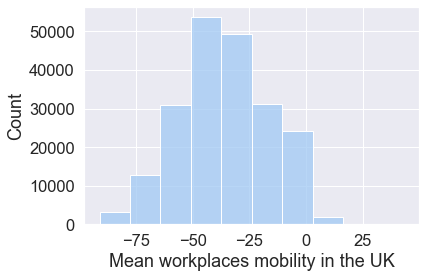

In [68]:
# Plot the distribution of the Workplaces mobility category as a histogram
ax = sns.histplot(mobility_trends_UK["Workplaces"], bins=10)

# Change the label of the horizontal axis
ax.set(xlabel="Mean workplaces mobility in the UK");

The distribution of Workplaces mobility appears symmetric, meaning that the left side of the distribution largely mirrors the right side.

In addition, we can use the `histplot()` to compare any two or more distributions by plotting them simultaneously.

<AxesSubplot:ylabel='Count'>

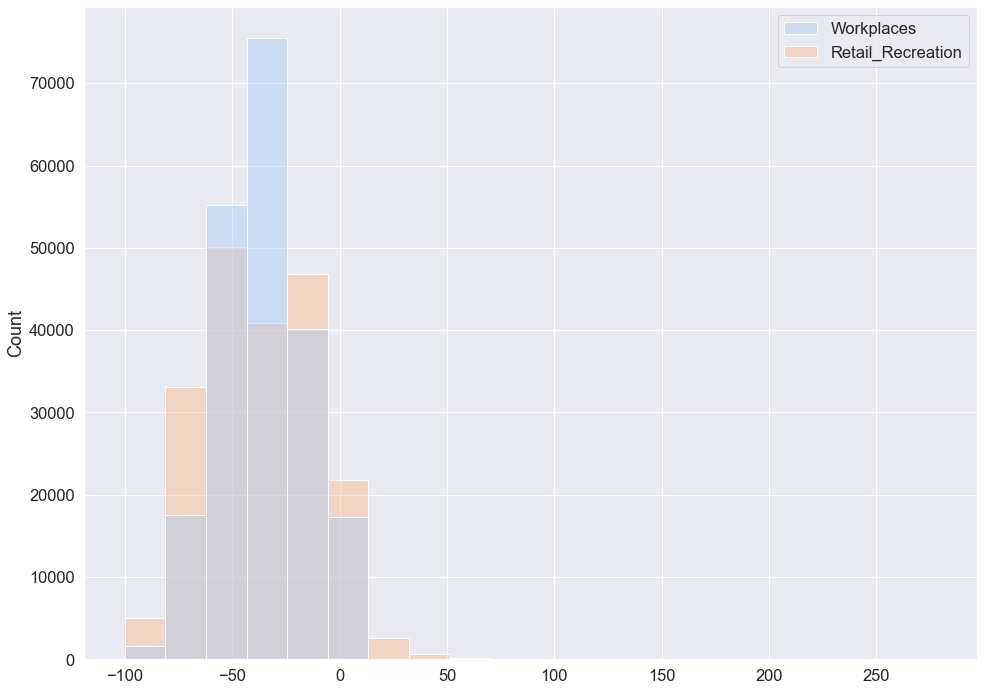

In [69]:
# Plot two (or more) variables as histograms in a single plot
plt.figure(figsize=(16, 12))
sns.histplot(
    mobility_trends_UK[["Workplaces", "Retail_Recreation"]], alpha=0.4, bins=20
)

Both distributions appear symmetric. The distribution of Retail and Recreation mobility is slightly wider compared to the distribution of Workplaces mobility which is more centered around the mean. We can examine the distributions further by computing the mean and the standard deviation of mobility change in the UK across the six mobility categories since mid-February 2020.

Mean mobility change in the UK across mobility categories.

In [70]:
mobility_trends_UK.iloc[:, 9:15].mean()

Retail_Recreation   -36.809680
Grocery_Pharmacy     -8.658667
Parks                28.105415
Transit_stations    -38.142992
Workplaces          -35.856338
Residential          12.764187
dtype: float64

Standard deviation (std) of mobility change in the UK across mobility categories.

In [71]:
mobility_trends_UK.iloc[:, 9:15].std()

Retail_Recreation    26.273590
Grocery_Pharmacy     16.426443
Parks                54.650707
Transit_stations     23.548502
Workplaces           19.692586
Residential           7.421347
dtype: float64

These outputs confirm that the distribution of Retail and Recreation mobility is slightly wider (std = 25.1) compared to the distribution of Workplaces mobility (std = 19.7).

# Plotting pairwise relationships

You can obtain a summary of interesting pairwise relationships between mobility categories in your data set. In Seaborn, `PairGrid` allows you to draw a grid of small subplots where each row and column corresponds to a different variable. The resulting grid displays all the pairwise relationships in the data set. In the case of mobility data, the plot displays all pairwise relationships between the mean mobility change for each mobility category in the United Kingdom since mid February 2020. Each data point in the plots below represents a UK county. The plot enables a quick examination of pairwise relationships between those mean mobility changes across counties, and makes easy to determine in an 'open-minded' manner apparent positive relationships, negative relationships, or no relationships.

In [72]:
# Compute the mean mobility change for each mobility category across UK counties
mobility_trends_UK_mean = mobility_trends_UK.groupby("sub_region_1")[
    [
        "Retail_Recreation",
        "Grocery_Pharmacy",
        "Parks",
        "Transit_stations",
        "Workplaces",
        "Residential",
    ]
].mean()

# Check the data in the DataFrame of mean mobility change we computed
mobility_trends_UK_mean.head()

Retail_Recreation  Grocery_Pharmacy      Parks  \
sub_region_1                                                              
Aberdeen City                   -50.046371        -10.722567  20.557692   
Aberdeenshire                   -28.253669        -11.248447  22.474684   
Angus Council                   -25.955975         -6.125786  13.982143   
Antrim and Newtownabbey         -29.377358         -7.465409 -29.134328   
Ards and North Down             -27.262055          0.452830   6.838298   

                         Transit_stations  Workplaces  Residential  
sub_region_1                                                        
Aberdeen City                  -46.127016  -42.489919    14.567010  
Aberdeenshire                  -39.953878  -37.207661    12.222222  
Angus Council                  -31.150943  -33.542339    10.831551  
Antrim and Newtownabbey        -53.752621  -33.679435    12.859031  
Ards and North Down            -41.721311  -35.991935    12.679039

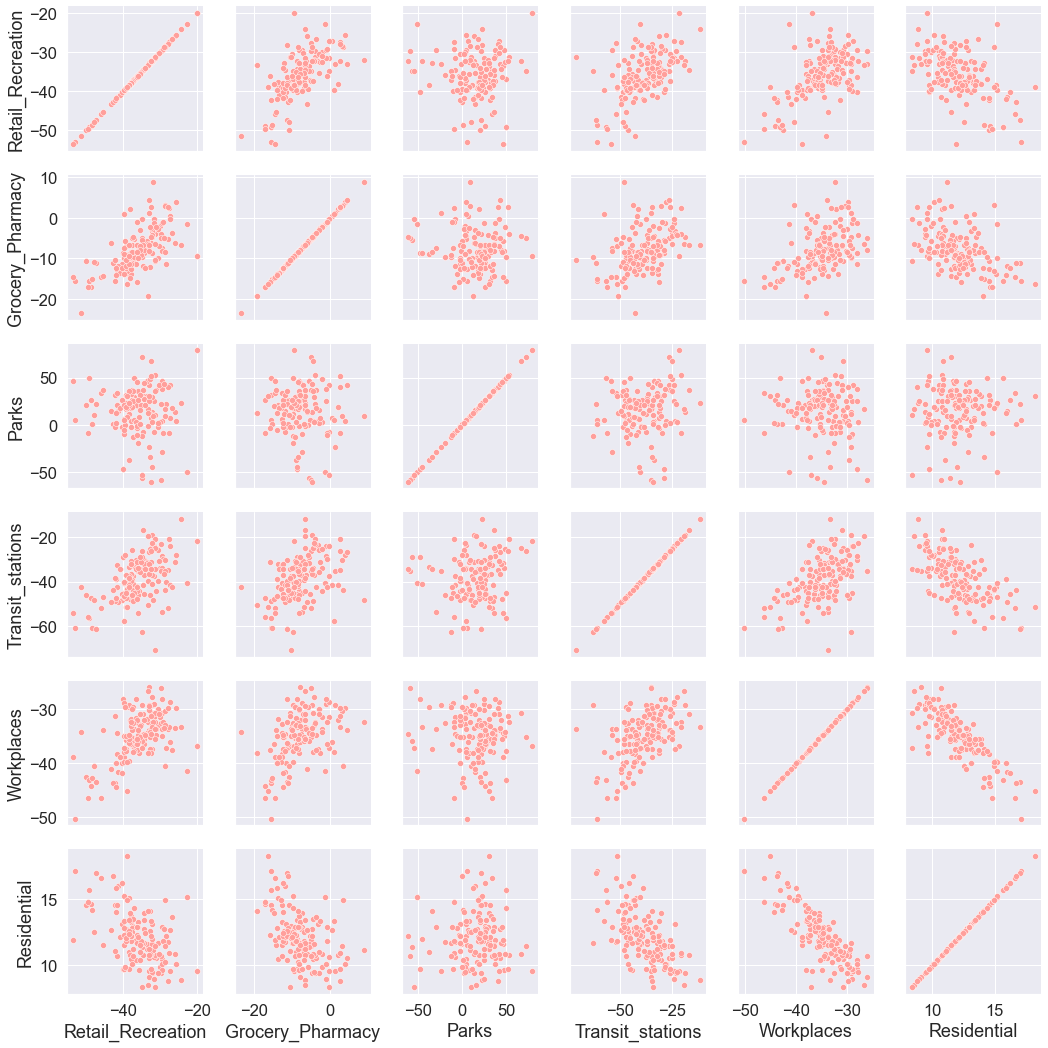

In [73]:
# Draw a multi-grid scatterplots of pairwise relationships
grid = sns.PairGrid(mobility_trends_UK_mean)
grid.map(sns.scatterplot, color="r")

The information on the diagonal is not informative as it shows how a variable is correlated with itself. Instead, we could display a histogram on the diagonal representing the distribution of each mobility category.

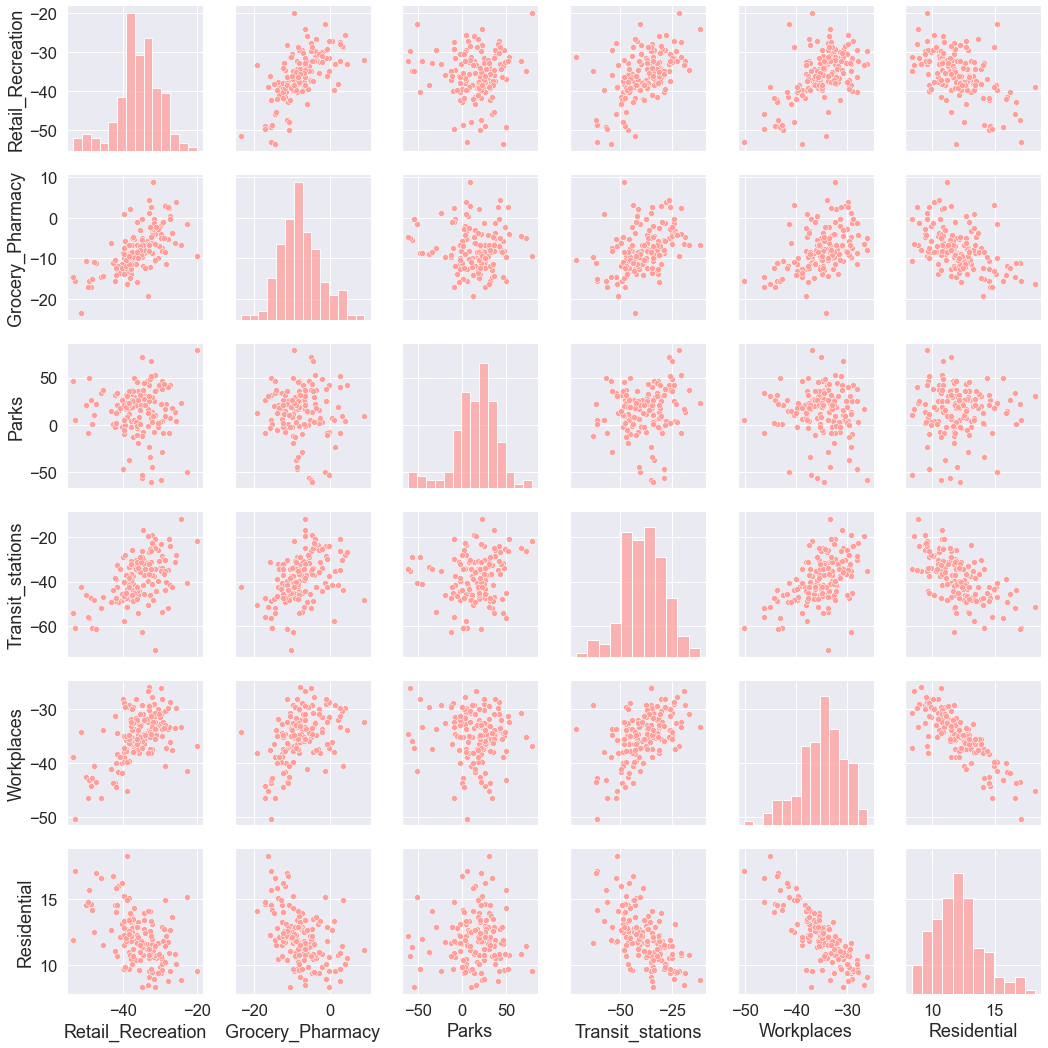

In [74]:
# Draw a multi-plot of scatterplots representing pairwise relationships
grid = sns.PairGrid(mobility_trends_UK_mean)
grid.map_diag(sns.histplot, color="r")
grid.map_offdiag(sns.scatterplot, color="r")

## Interpreting pairwise relationships

Let's interpret the pairwise relationships between the mean mobility trends. Which mobility trends appear to be involved in: 
- positive relationship
- negative relationship
- no relationship

Recall that each data point represents a UK county.

# RQ6: How correlated are mobility categories across UK counties?


We first perform correlation analysis to determine the strength and the direction of the relationship between our six mobility categories. We use the Pandas function `corr()` to compute the correlation coefficients and then pass the output to the Seaborn `heatmap()` function to visualise the strength and direction of the relationships.

In [75]:
# Compute pairwise correlation between our six mobility categories
# using the original (non-aggregated) mobility_trends_UK DataFrame.
mobility_trends_UK_corr = mobility_trends_UK.iloc[:, 9:15].corr()
mobility_trends_UK_corr

Retail_Recreation  Grocery_Pharmacy     Parks  \
Retail_Recreation           1.000000          0.741545  0.434700   
Grocery_Pharmacy            0.741545          1.000000  0.429703   
Parks                       0.434700          0.429703  1.000000   
Transit_stations            0.727399          0.582958  0.392288   
Workplaces                  0.583437          0.501260  0.131670   
Residential                -0.714937         -0.539698 -0.230731   

                   Transit_stations  Workplaces  Residential  
Retail_Recreation          0.727399    0.583437    -0.714937  
Grocery_Pharmacy           0.582958    0.501260    -0.539698  
Parks                      0.392288    0.131670    -0.230731  
Transit_stations           1.000000    0.632836    -0.704256  
Workplaces                 0.632836    1.000000    -0.914917  
Residential               -0.704256   -0.914917     1.000000

# Visualising correlation

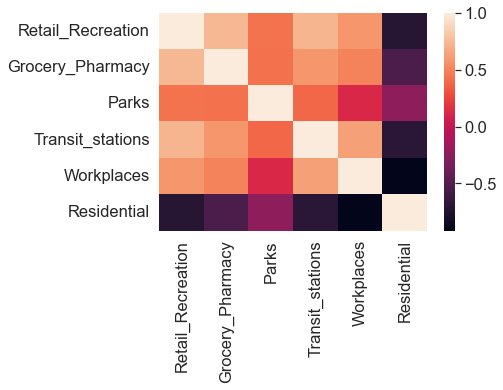

In [76]:
# Plot a heatmap based on the correlation analysis
sns.heatmap(mobility_trends_UK_corr);

We now fit a toy linear regression model using the `linregress()` function from the `SciPy.stats` module. We regress residential mobility on workplaces mobility.      

In [77]:
# Fit a linear regression model and store results
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x=mobility_trends_UK["Workplaces"], y=mobility_trends_UK["Residential"]
)
slope, intercept, r_value, p_value, std_err

(nan, nan, nan, nan, nan)

The `linregress()` failed to return model output. This is because the function does not deal well with Not a Number (NaN) values. A straightforward solution during the exploratory phase of analysis is to remove NaNs. However, other approaches may be more informative at the modelling stage, including mean imputation. We perform mean imputation by replacing missing values of a variable by the mean computed on the non-missing observations of that variable.

In [78]:
# Number of rows and columns in the DataFrame with NaNs
mobility_trends_UK.shape

(209033, 15)

In [79]:
mobility_trends_UK_NADrop = mobility_trends_UK.dropna(
    subset=[
        "country_region",
        "sub_region_1",
        "date",
        "Retail_Recreation",
        "Grocery_Pharmacy",
        "Parks",
        "Transit_stations",
        "Workplaces",
        "Residential",
    ]
)

# Number of rows and columns in the DataFrame without NaNs
mobility_trends_UK_NADrop.shape

(150757, 15)

The `dropna()` function removes one quarter of the rows. In subsequent analysis, it would make sense to impute missing values, including a simple procedure for replacing NaNs with the mean value for that county and mobility category. 

Below we fit again a linear regression model using the new DataFrame that contain no NaN values.

In [80]:
# Fit a linear regression model and display outputs
model_outputs = stats.linregress(
    mobility_trends_UK_NADrop["Workplaces"], mobility_trends_UK_NADrop["Residential"]
)
model_outputs

LinregressResult(slope=-0.35580786753641186, intercept=0.3745693881369405, rvalue=-0.9297780751627193, pvalue=0.0, stderr=0.00036281934265285695)

In [81]:
model_outputs.slope

-0.35580786753641186

# Visualising linear regression
We now plot a regression line and 95% confidence interval using the Seaborn `regplot` function. We also include in a legend the correlation coefficient and the actual p-value. The p-value from the linear regression model outputs reads 0. The p-value, however, is never a 0. P-values less than .001 are typically reported as as P<.001, instead of the actual exact p-value. We indicate this in the visualisation below.

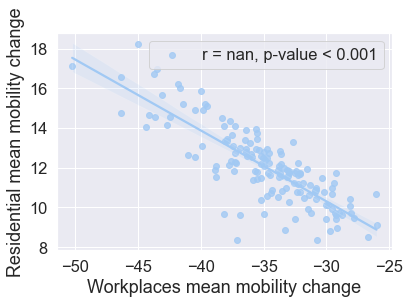

In [82]:
# Visualise a linear relationship between Workplaces mobility and Residential mobility

fig = sns.regplot(
    x="Workplaces",
    y="Residential",
    label="r = {0:.3}, p-value < {1:.3}".format(r_value, 0.001),
    data=mobility_trends_UK_mean,
)
fig.set(
    xlabel="Workplaces mean mobility change", ylabel="Residential mean mobility change"
)
fig.legend()

We used above the SciPy module to fit a linear least-squares regression model. There is another library in Python, `Statsmodels`, which is widely used for statistical analysis.

For completeness, we fit the same linear least-squares regression model as above using the `Statsmodels` function `OLS`. Recall that we gave the `Statsmodels` library the alias `sm` when we imported the library at the top of the notebook.      

In [83]:
# Rerun the ordinary least squares (OLS) regression  using the Statsmodels library

X = sm.add_constant(mobility_trends_UK_NADrop["Workplaces"])
Y = mobility_trends_UK_NADrop["Residential"]
model = sm.OLS(Y, X)
results = model.fit()
results

results.summary()
print_model = results.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            Residential   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 9.617e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        13:56:56   Log-Likelihood:            -3.7043e+05
No. Observations:              150757   AIC:                         7.409e+05
Df Residuals:                  150755   BIC:                         7.409e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3746      0.015     25.247      0.0

# Recording dependencies

In [84]:
# Install the watermark extension
!pip install -q watermark

# Load the watermark extension
%load_ext watermark

# Show packages that were imported
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
matplotlib : 3.3.2
seaborn    : 0.11.2
scipy      : 1.5.2
statsmodels: 0.12.2
pandas     : 1.1.3
numpy      : 1.19.2



Save a list of the packages (and their versions) used in the current notebook to a file named `requirements.txt`.

In [96]:
!pipreqsnb ../notebooks/05_data_exploration_and_visualisation.ipynb

pipreqs  --savepath ../notebooks/requirements.txt .//__temp_pipreqsnb_folder/
INFO: Successfully saved requirements file in ../notebooks/requirements.txt
